# **1. Data Preparation**

In [1]:
# Library
import pandas as pd # Pandas Library 
import numpy as np # Numpy Library

# Visualization
import matplotlib.pyplot as plt # For Data Visualization
import seaborn as sns # For Data Visualization

# Feature Engineering
from sklearn.pipeline import Pipeline # to Create a Pipeline for Feature Engineering
from sklearn.impute import SimpleImputer # For Missing Value Handling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder # to Handle Catogorical Features
from sklearn.compose import ColumnTransformer # to Transform Features
import category_encoders as ce # to encode category features

# Model Selection
from sklearn.linear_model import LogisticRegression # Base Model for Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Base Model for Decision Tree 
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV , GridSearchCV# Finding Best Hyperparameter with GridsearchCV
from sklearn.metrics import classification_report, confusion_matrix # to Display Classification Report and Confusion Matrix
from sklearn.neighbors import KNeighborsClassifier # Base Model for KNN
from sklearn.ensemble import RandomForestClassifier # Ensemble method using Random Forest
from xgboost import XGBClassifier # Ensemble method using XGBoost
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score # Evaluation Metric

# Imbalance Dataset
from imblearn.pipeline import Pipeline # to Create Pipeline for Imbalance Handling
from imblearn.over_sampling import RandomOverSampler, SMOTE # Random Over Sample as Imblance Handling method
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

# Ignore Warning
import warnings 
warnings.simplefilter("ignore")

## **Problem Statement**:
Berhentinya pelanggan menggunakan layanan jasa dari perusahaan merupakan metrik penting untuk melakukan evaluasi bisnis. Karena mempertahankan pelanggan yang pergi jauh lebih hemat biaya dari pada mencari pelanggan baru. Hal ini di pengaruhi dari banyak faktor salah satunya pelanggan memilih penyedia layanan lain dan persaingan antara perusahaan setiap tahunnya mencapai 15-25% yang kompetitive untuk mendapatkan pelanggan.

Untuk mengurangi perginya pelanggan dari perusahaan, maka perusahaan perlu melakukan pendekatan pada pelanggan untuk mencengahnya pergi dari perusahaan. Hal ini dapat dilakukan dengan menerapkan machine learning pada bisnis perusahaan dengan menemukan klasifikasi total pelanggan yang seharunya mendapatkan pendekatan dari perusahaan (Dapat berupa promo atau campaign), hal ini diperlukan karena jika perusahaan memberikan pada semua pelanggan untuk campaign dan promonya maka akan memerlukan biaya yang besar sehingga ini akan semakin beresiko pada perusahaan untuk segi beban di laporan laba rugi.

## **Goals**:
Berdasarkan pendahuluan dan rumusan masalah, proyek ini bertujuan untuk mengembangkan model pembelajaran mesin learning yang nanti dapat digunakan perusahaan untuk mengklasifikasi pelanggan mana yang akan pergi dan pelanggan mana yang tidak pergi.

Hal ini akan berguna untuk perusahaan ketika mempertahankan pelanggan yang sudah ada dengan memberikan manfaat promosi dengan target yang lebih jelas dan hal ini akan mengurangi pengeluaran perusahaan dibandingkan ketika perusahaan memberikan promosi kepada semua pelanggan agar mereka tidak pergi atau memberikan kepada customer baru dan dampak lainnya ketika promosi difokuskan pada pelanggan sudah ada diperusahaan sehingga akan menghemat biaya promosi dan dapat menambah pendapatan dari pelanggan yang tidak pergi ini.

## **Metrics**
- 0 = Non-Churn (Negative)
- 1 = Churn (Positive)

Error tipe 1: False Positive

Kesalahan ini akan menambah beban perusahaan dengan memberikan keuntungan dan promosi kepada pelanggan non-churn dan mengabaikan pelanggan yang berpindah.

Error Tipe 2: False Negative

Kesalahan ini akan membuat perusahaan mengabaikan pelanggan mereka yang berpindah tanpa memberi mereka manfaat/promosi untuk mempertahankan retensi mereka.

## **Analytical Approach**
- Pendekatan analisa ini dengan cara melakukan pembagian variabel pada saat dilakukan Exploratory Data Analyst dan Visualisasi Data:
  - Melakukan Exploratory Data Analyst terhadap seluruh variabel yang ada untuk mengetahui karakteristik pelanggan yang berhenti berlangganan (Jupyter NoteBook).
  - Melakukan Visualisasi data dari setiap analisa untuk mendapatkan gambaran secara visual dari hasil Exploratory Data Analyst (Tableau).
  - Untuk model pembelajaran mesin, kami ingin memprediksi pelanggan yang memiliki risiko churn yang tinggi. Dalam hal ini, kita akan menggunakan Model Klasifikasi untuk memprediksi Churn Customer dan disini difokuskan rekomendasi campaign pada False Positif.

## **Define Columns**

| **Nama Kolom** |**Keterangan Kolom** |
| --- | --- |
|CustomerID| ID unik yang mengidentifikasi setiap pelanggan|
|gender | Jenis kelamin pelanggan|
|Senior Citizen | Menunjukkan jika pelanggan berusia 65 tahun ke atas|
|Partner | Menunjukkan jika pelanggan memiliki akun berbagi|
|Dependents | Menunjukkan jika pelanggan tinggal dengan tanggungan. Tanggungan bisa anak-anak, orang tua, kakek-nenek, dll.|
|Tenure | Berapa lama pelanggan telah menjadi pelanggan|
|Phone Service | Menunjukkan jika pelanggan berlangganan layanan telepon rumah dengan perusahaan|
|MultipleLines | Menunjukkan jika pelanggan berlangganan beberapa saluran telepon dengan perusahaan|
|Internet Service | Menunjukkan apakah pelanggan berlangganan layanan internet|
|Online Security | Menunjukkan jika pelanggan berlangganan layanan keamanan online tambahan|
|Online Backup | Menunjukkan apakah pelanggan berlangganan layanan pencadangan online tambahan|
|DeviceProtection | Menunjukkan jika pelanggan berlangganan perlindungan perangkat tambahan untuk peralatan Internet mereka|
|Tech Support | Menunjukkan apakah pelanggan berlangganan layanan dukungan teknis|
|Streaming TV | Menunjukkan jika pelanggan menggunakan layanan Internet mereka untuk melakukan streaming program televisi dari penyedia pihak ketiga|
|Streaming Film | Menunjukkan jika pelanggan menggunakan layanan Internet mereka untuk melakukan streaming film dari penyedia pihak ketiga|
|Kontrak | Menunjukkan jenis kontrak pelanggan saat ini|
|Paperless Billing | Menunjukkan jika pelanggan telah memilih paperless billing|
|Payment Method | Menunjukkan bagaimana pelanggan membayar tagihan mereka|
|Monthly Charges | Menunjukkan total biaya bulanan pelanggan saat ini untuk semua layanan mereka dari perusahaan|
|Total Charges | Menunjukkan total biaya pelanggan|
|Churn | Menunjukkan apakah pelanggan memiliki TV streaming atau tidak (Ya, Tidak, Tidak ada layanan internet)|

# **2. DATA WRANGLING**

In [2]:
df= pd.read_csv('Telco-Customer-Churn.csv')
pd.options.display.max_columns=100
pd.options.display.max_rows=1500000
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.duplicated().sum()

0

Handle Outlier

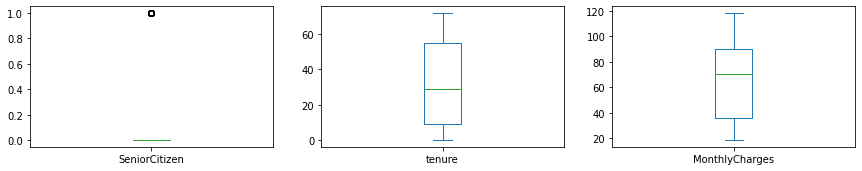

In [6]:
# Plot boxplot untuk mengecek outliers
df.plot(kind='box', figsize=(20,15), subplots=True, layout=(5,4))
plt.show()

In [7]:
# Membuat fungsi untuk mengecek outliers
def check_outliers(df,col):
    Q1=df[col].describe()['25%']
    Q3=df[col].describe()['75%']
    IQR=Q3-Q1
    Upper_fence=Q3+(1.5*IQR)
    Lower_fence=Q1-(1.5*IQR)
    df_outliers=df[(df[col]<Lower_fence) | (df[col]>Upper_fence)]
    if len(df_outliers)==0:
        return 'Tidak Ada Outliers'
    else:
        return df_outliers

SeniorCitizen

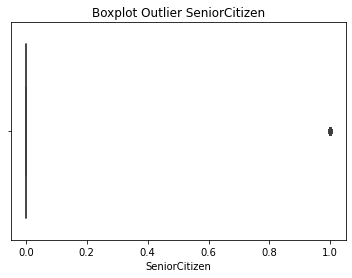

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No


In [8]:
# Mengecek outliers pada fitur total_rooms
sns.boxplot(df['SeniorCitizen'])
plt.title('Boxplot Outlier SeniorCitizen')
plt.show()
## Codingan untuk menampilkan data frame yang miliki outlier untuk kolom total_rooms
outliers_SeniorCitizen=check_outliers(df,'SeniorCitizen')
outliers_SeniorCitizen.head()

In [9]:
## Mencetak informasi total outlier dari kolom total_rooms
print(f'Total outlier pada kolom senior citizen : {outliers_SeniorCitizen.shape[0]}')
print(f'Total data awal: {df.shape[0]}')
print(f'Persentase total outlier dari total data (%): {(outliers_SeniorCitizen.shape[0]/df.shape[0])*100}')

Total outlier pada kolom senior citizen : 1142
Total data awal: 7043
Persentase total outlier dari total data (%): 16.21468124378816


In [10]:
# # Menghapus outlier
# df.drop(outliers_SeniorCitizen.index,inplace=True)

# # Mengecek kembali outliers pada fitur SeniorCitizen
# sns.boxplot(df['SeniorCitizen'])
# plt.title('Boxplot Outlier SeniorCitizen')
# plt.show()

MonthlyCharges

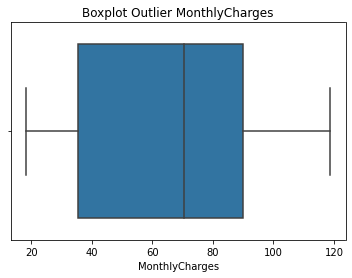

In [11]:
# Mengecek outliers pada fitur total_rooms
sns.boxplot(df['MonthlyCharges'])
plt.title('Boxplot Outlier MonthlyCharges')
plt.show()

In [12]:
## Codingan untuk menampilkan data frame yang miliki outlier untuk kolom total_rooms
outliers_MonthlyCharges=check_outliers(df,'MonthlyCharges')
outliers_MonthlyCharges

'Tidak Ada Outliers'

Tenure

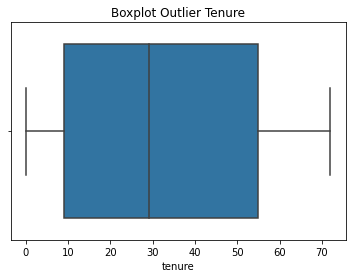

'Tidak Ada Outliers'

In [13]:
# Mengecek outliers pada fitur total_rooms
sns.boxplot(df['tenure'])
plt.title('Boxplot Outlier Tenure')
plt.show()
## Codingan untuk menampilkan data frame yang miliki outlier untuk kolom total_rooms
outliers_tenure=check_outliers(df,'tenure')
outliers_tenure

In [14]:
df['TotalCharges'] = df['tenure'] * df['MonthlyCharges']

In [15]:
df.drop(columns=['customerID','MonthlyCharges'],inplace=True)

# **3. DATA ANALYST**

In [16]:
total = float(len(df))

#### Gender

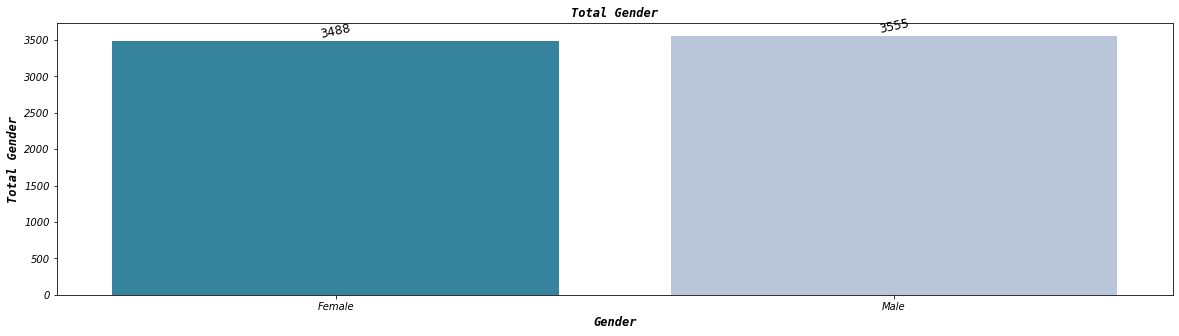

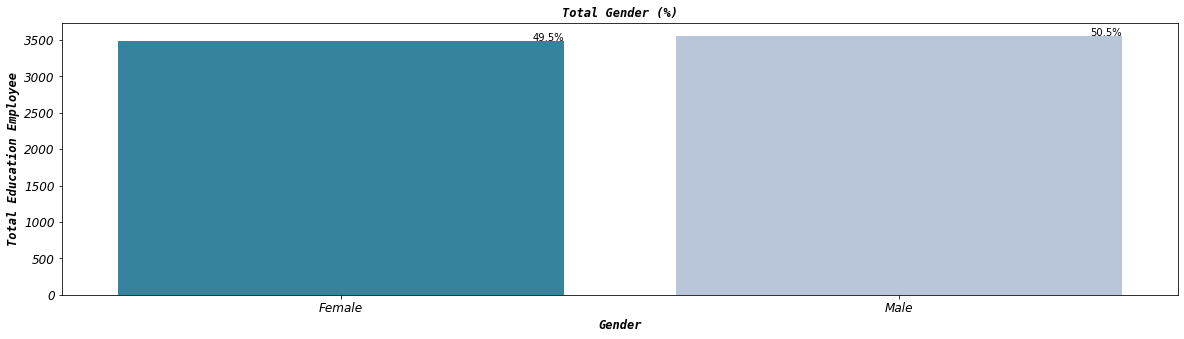

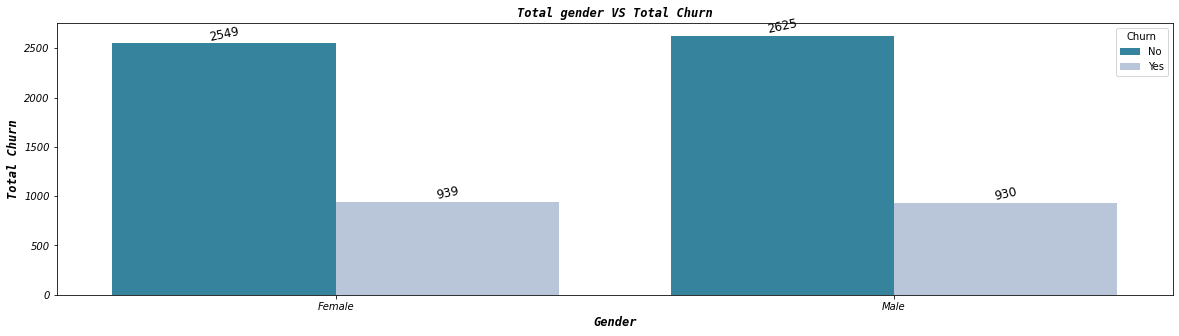

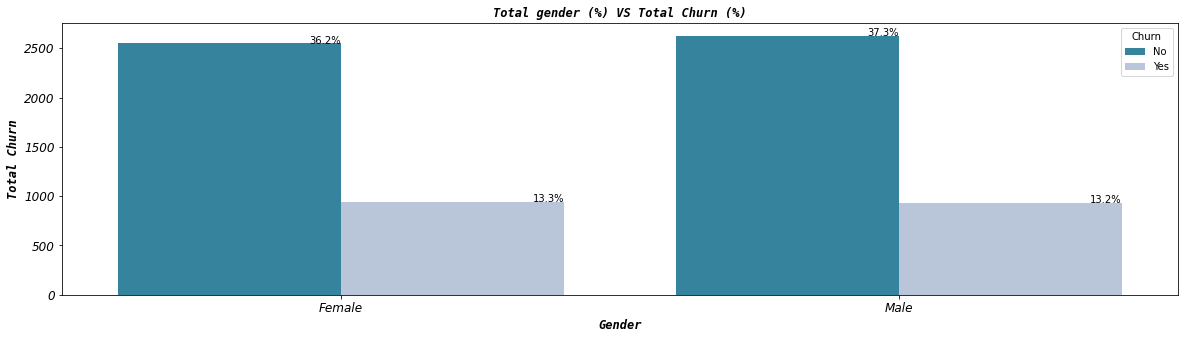

In [17]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='gender', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Gender',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Gender', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Gender', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="gender",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Gender (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Gender', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Education Employee', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='gender', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total gender VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Gender', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Churn', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="gender", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total gender (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Gender', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Churn', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Total pelanggan perusahaan `gender male` sebanyak 3.555 atau setara dengan 50,5%, angka ini lebih tinggi dari pelanggan `gender female` yang berjumlah 3.488 dengan total persentase 49,5%.
  - Untuk pelanggan yang berhenti berlanggan dengan layanan jasa perusahaan paling banyak dari `gender female` dengan total persentase berhenti 13,3% hal ini lebih tinggi dari total pelanggan yang berhenti menggunakan layanan jasa perusahaan dari `gender male` yaitu 13,2%.
  - Pelanggan yang paling banyak masih menggunakan layanan perusahaan dari `gender male` dengan total persentase 37,3% lebih tinggi dari pada pelanggan yang yang `gender female` 36,2%.

#### Senior Citizen

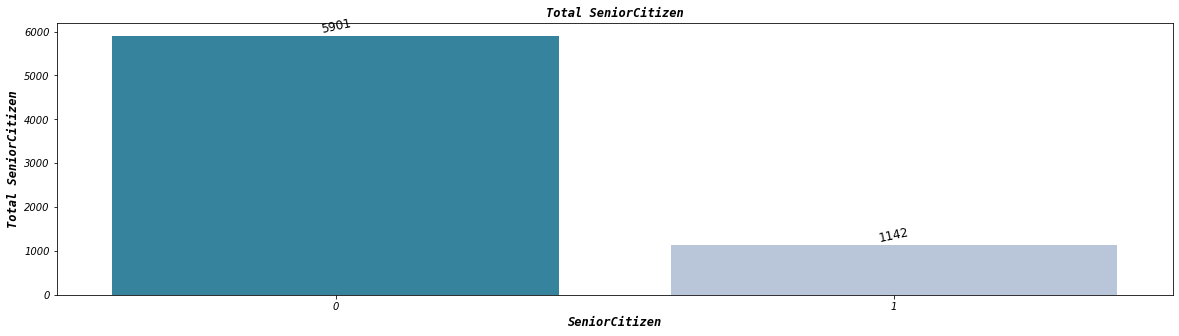

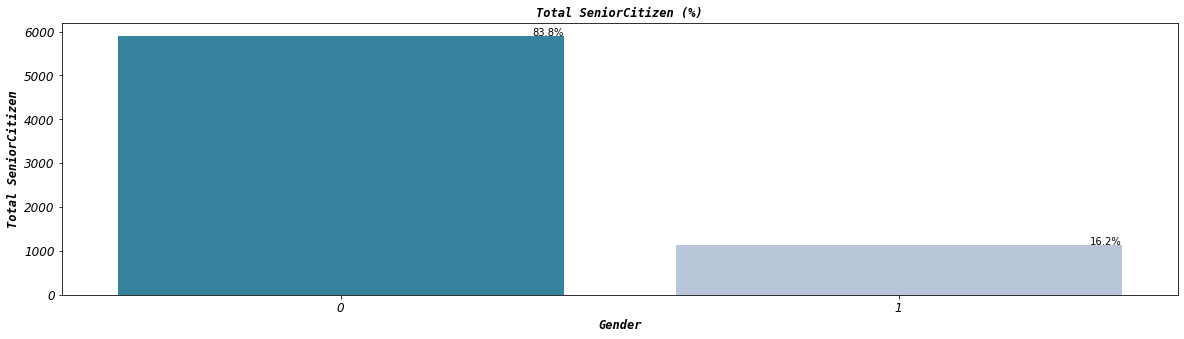

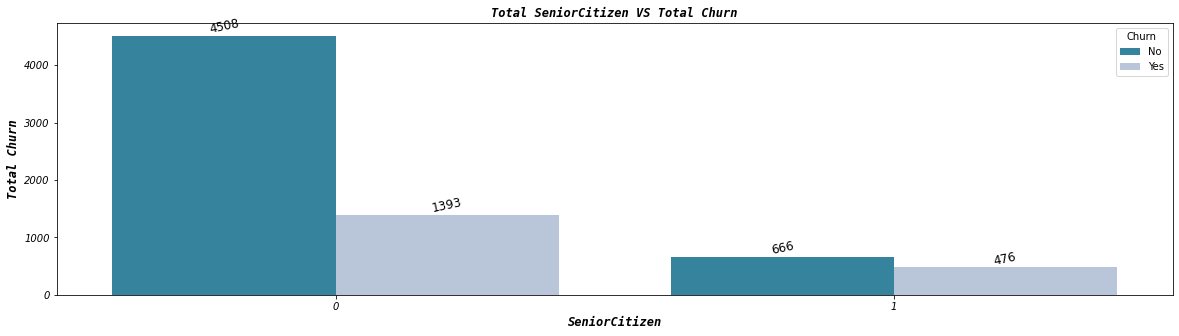

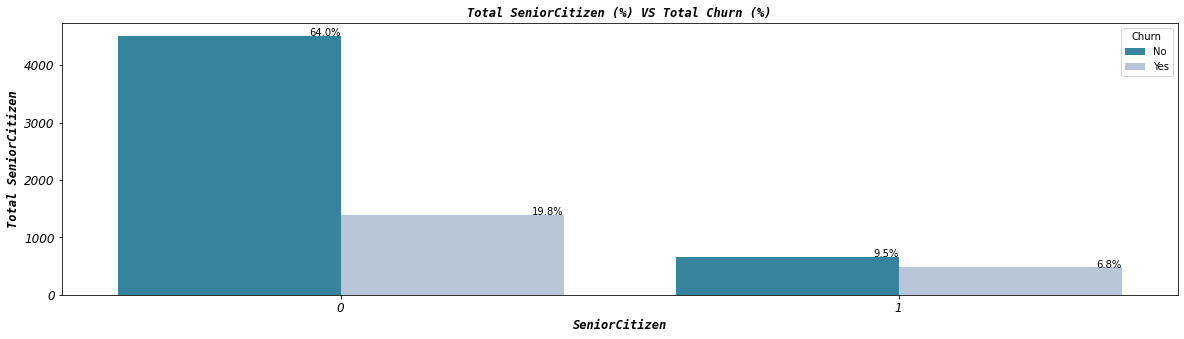

In [18]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='SeniorCitizen', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total SeniorCitizen',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('SeniorCitizen', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total SeniorCitizen', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="SeniorCitizen",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total SeniorCitizen (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Gender', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total SeniorCitizen', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='SeniorCitizen', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total SeniorCitizen VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('SeniorCitizen', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Churn', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total SeniorCitizen (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('SeniorCitizen', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total SeniorCitizen', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
    - Pelanggan yang pergi paling banyak yang sudah berumur lansia dengan total persentase 41,68% sedangkan umur di bawah lansia memiliki persentase paling banyak bertahan yaitu sebanyak 76,39%.
    - Untuk pelanggan yang masih menggunakan layanan perusahaan paling banyak ada pada pelanggan yang dibawah 60tahun `Non SeniorCitizen / Category 0` dengan total pelanggan 4.508 dengan total persentase 64%.
    - Sedangkan pelanggan yang berhenti juga paling banyak dari dibawah 60tahun `Non SeniorCitizen / Category 0` dengan total 1.393 dengan total 19.8% sedangkan pelanggan yang atas 60 tahun yang berhenti menggunakan layanan jasa perusahaan sebanyak 476 atau setara dengan 6,8%.


#### Partner

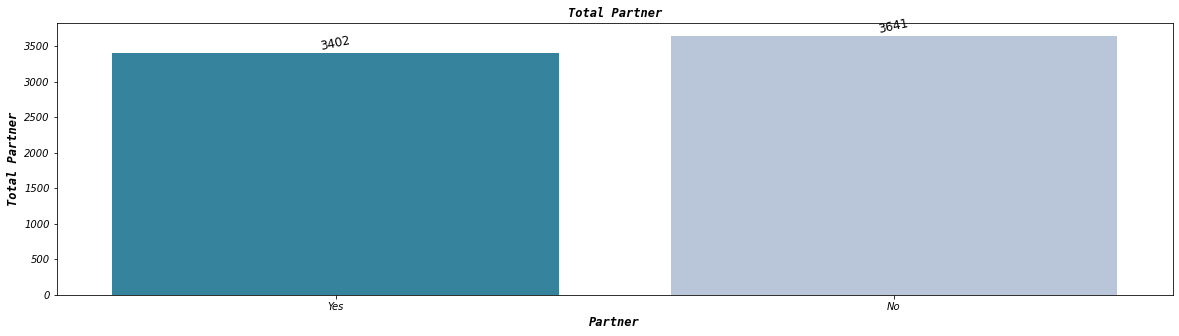

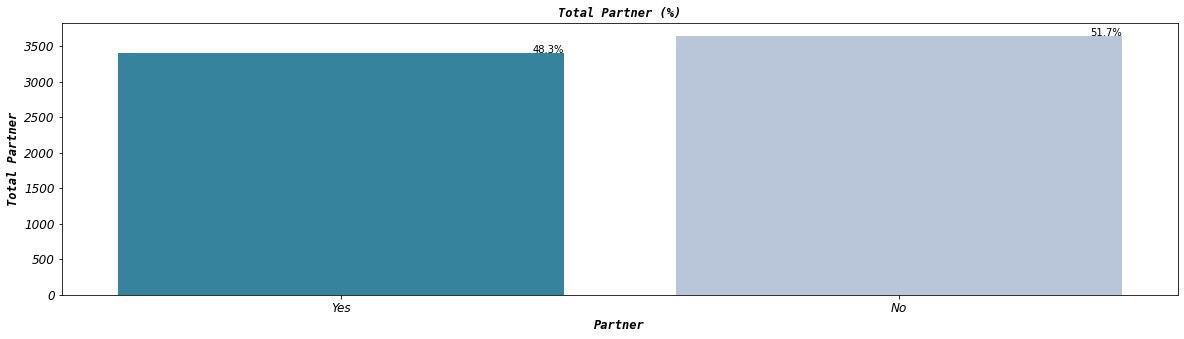

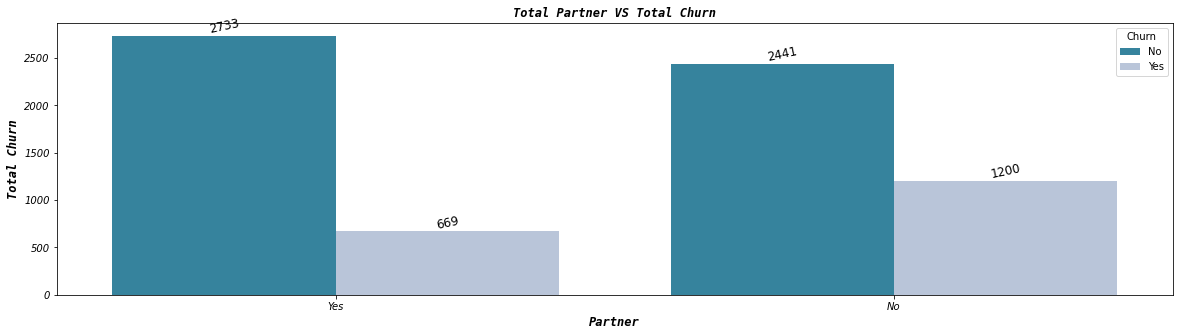

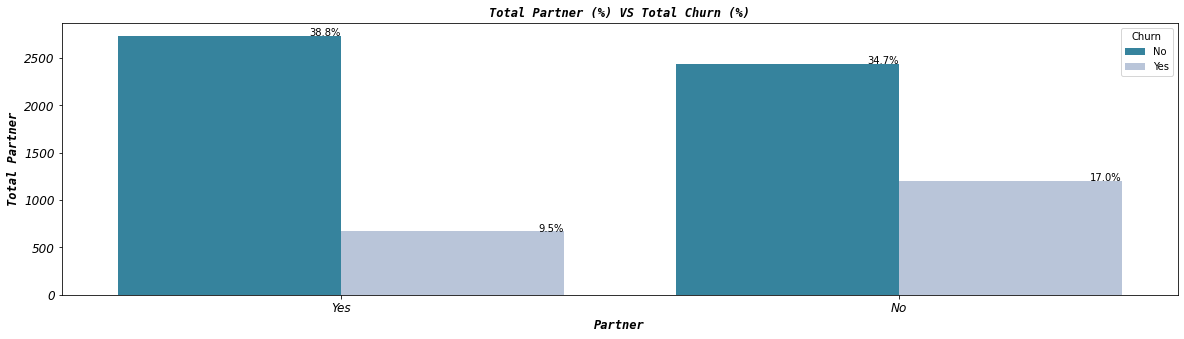

In [19]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Partner', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Partner',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Partner', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Partner', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="Partner",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Partner (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Partner', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Partner', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='Partner', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Partner VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Partner', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Churn', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="Partner", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Partner (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Partner', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Partner', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Pelanggan yang memiliki `partner` atau pasangan memiliki jumlah lebih rendah yaitu 3.402 dengan persentase 48,3% dibandingkan pelanggan yang memiliki pasangan 3.641 dengan total persentase 51,7%
- Pelanggan yang tidak berbagi akun paling banyak bertahan menggunakan layanan jasa perusahaan 2.733 dengan persentase 38.8% dibandingkan pelanggan yang berbagi akun 2.441 dengan total persentase 34,7% 
- Sedangkan pelanggan yang berhenti langganan paling banyak dari pelanggan yang berbagi akun sebanyak 1.200 orang dengan total persentase 17% dan pelanggan yang tidak berbagi akun memiliki jumlah berhenti sebanyak 669 orang atau setara dengan 9,5%.

#### Dependents

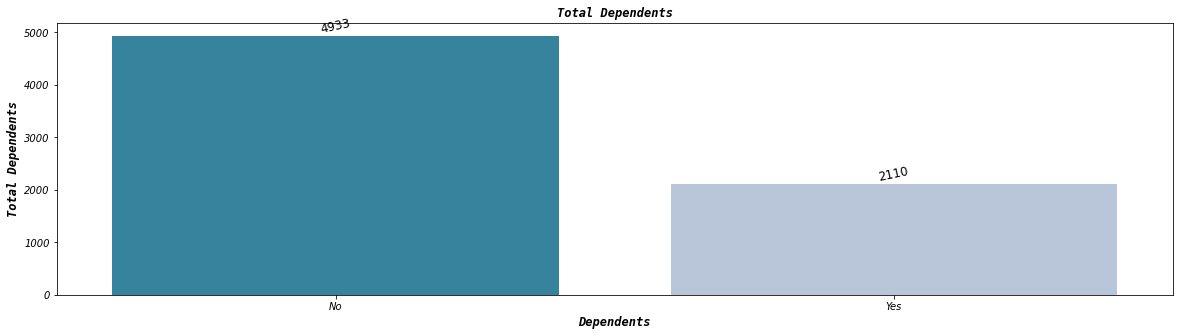

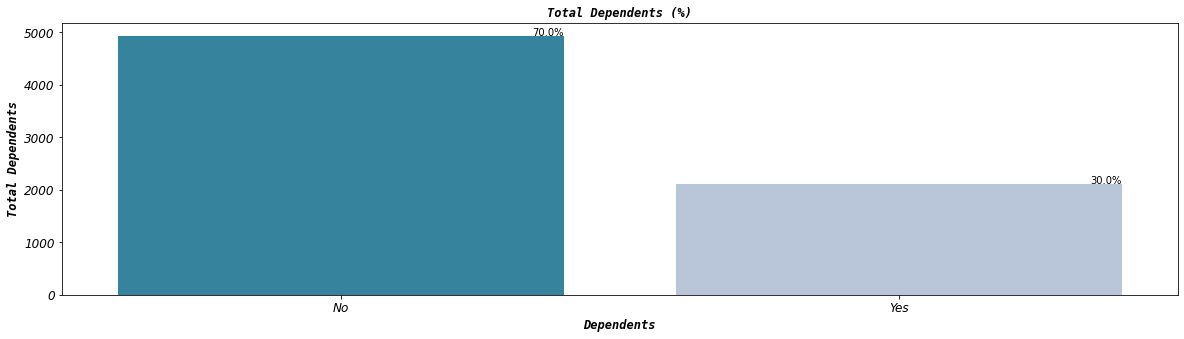

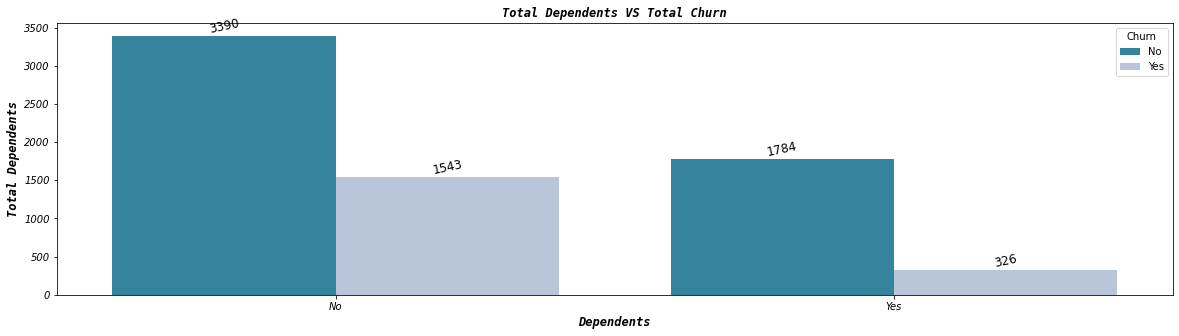

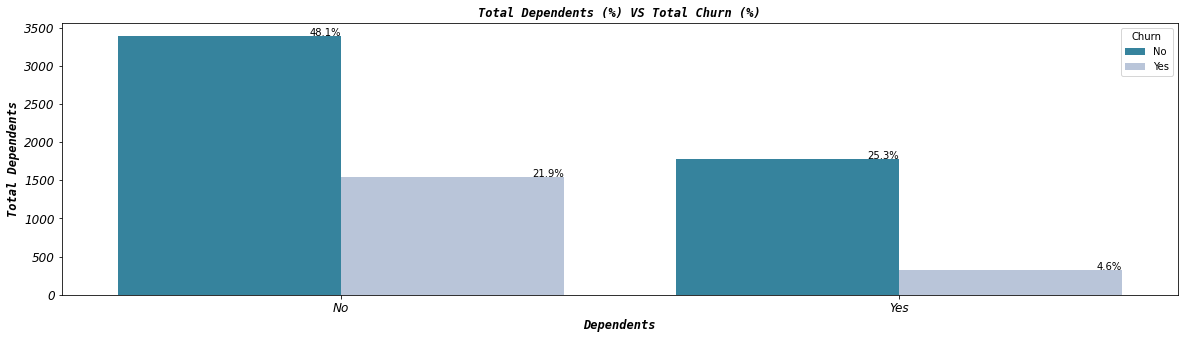

In [20]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Dependents', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Dependents',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Dependents', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Dependents', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="Dependents",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Dependents (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Dependents', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Dependents', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='Dependents', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Dependents VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Dependents', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Dependents', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="Dependents", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Dependents (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Dependents', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Dependents', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Pelanggan perusahaan yang tidak memiliki tanggungan ` Non Dependent` sebanyak 4.933 setara dengan 70% sedangkan pelanggan yang memiliki tanggungan `Dependent` ada 2.110 dengan total persentase 30%
  - Pelanggan yang masih berlangganan dengan layanan jasa perusahaan berasal dari pelanggan yang ` Non Dependent` sebanyak 3.390 dengan total persentase 48.1% lebih tinggi dari pada pelanggan yang bertahan dengan status `Dependent`layanan jasa perusahaan dengan total pelanggan 1.784 dengan total persentase 25,3%
  - Untuk pelanggan yang berhenti berlangganan dengan layanan jasa perusahaan paling banyak dari pelanggan yang `Non Dependent` dengan total pelanggan 1.543 dengan total persentase 21,9% hal ini lebih tinggi dari pada pelanggan yang berstatus `Dependent` yang berjumlah 326 dengan total persentase 4,6%.

#### Tenure

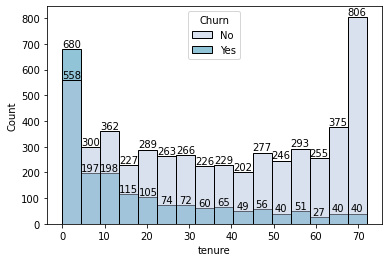

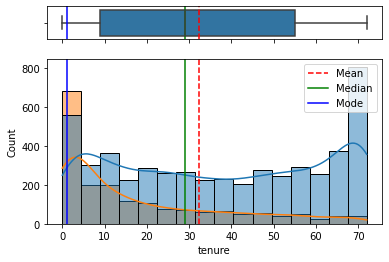

In [21]:
ax = sns.histplot(data=df, x='tenure', hue='Churn',palette='PuBuGn')
plt.xticks(rotation=0,size=10)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['tenure'].mean()
median=df['tenure'].median()
mode=df['tenure'].mode().values[0]

sns.boxplot(data=df, x="tenure",hue='Churn', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="tenure",hue='Churn', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

- Insight :
  - Pelanggan yang banyak berhenti berlanggan ketika memasuki 10 bulan ke atas yang terus meningkat hingga bulan terlama yaitu 70 bulan sedangkan pelanggan yang churn paling banyak ketika di 10 bulan awal dan mulai menurun tingkat churnnya ketika memasuki bulan ke 10.
  - Rata - rata pelanggan yang berhenti berlangganan pada bulan 30.

#### PhoneService

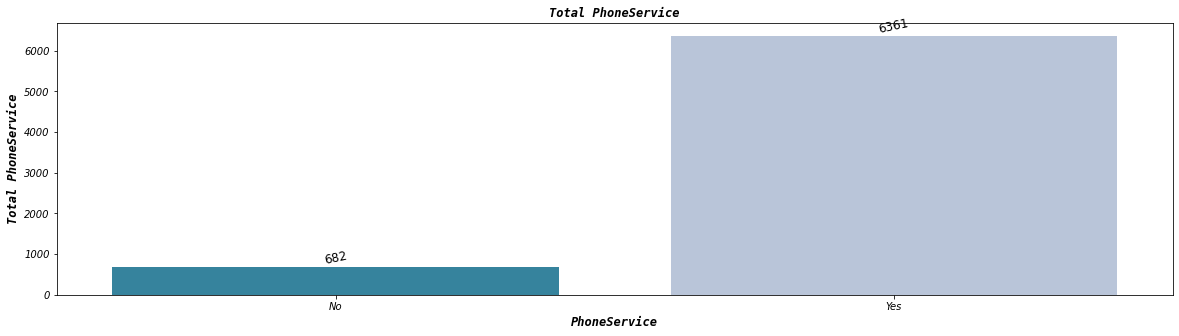

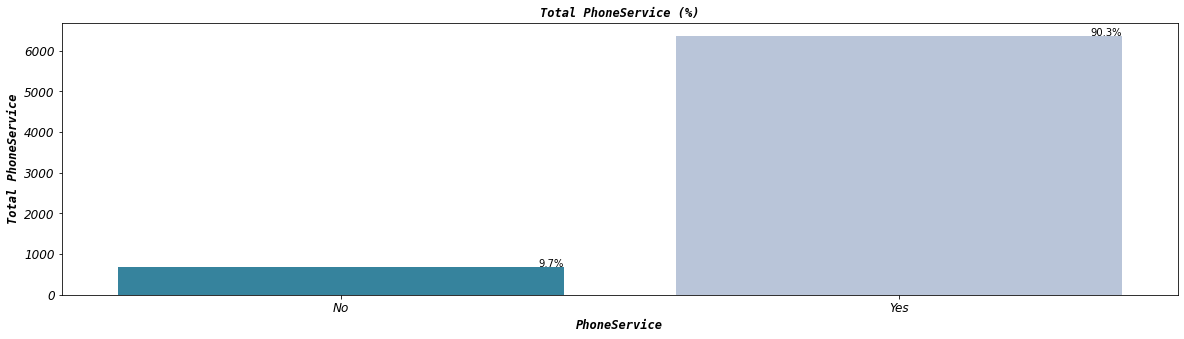

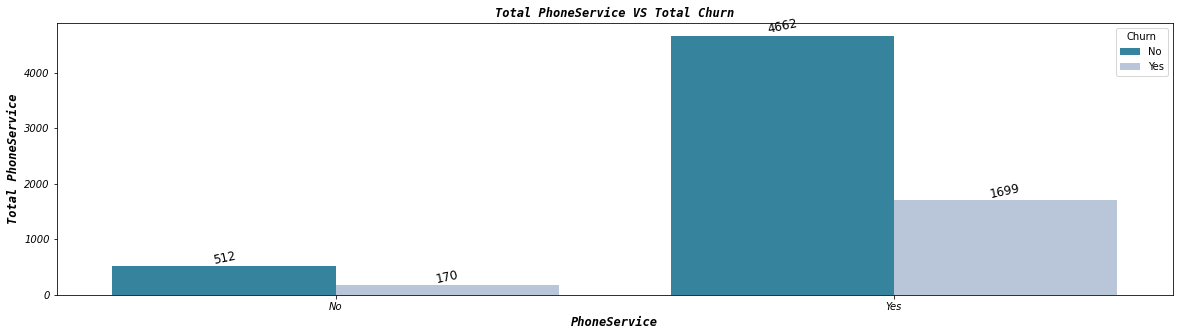

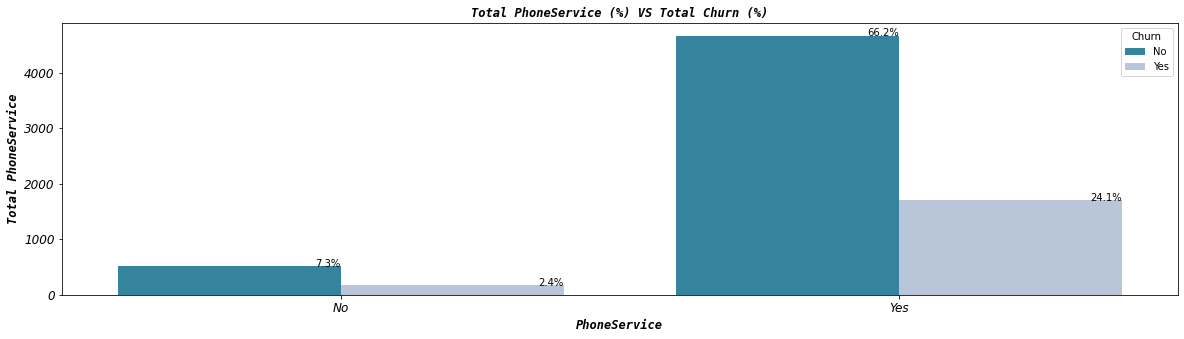

In [22]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='PhoneService', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total PhoneService',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('PhoneService', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total PhoneService', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="PhoneService",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total PhoneService (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('PhoneService', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total PhoneService', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='PhoneService', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total PhoneService VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('PhoneService', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total PhoneService', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="PhoneService", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total PhoneService (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('PhoneService', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total PhoneService', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight : 
    -	Banyak pelanggan yang menggunakan layanan telephone rumah 6361 atau setara dengan 90,3% sedangkan pelanggan yang tidak banyak menggunakan layanan telephone rumah sebanyak 682 atau setara dengan 9,7%.
    -	Pelanggan yang bertahan menggunakan layanan perusahaan banyak dari yang menggunakan layanan telephone rumah dengan total 4662 atau setara dengan 66,2%, hal ini lebih tinggi dari pada pelanggan yang tidak menggunakan layanan telephone rumah dengan total 512 atau setara dengan 7,3%.
    -	Pelanggan yang berhenti menggunakan layanan perusahaan banyak berasal dari pelanggan yang menggunakan layanan telephone rumah dengan total persentase 1.699 dengan total persentase 24,1% sedangkan pelanggan yang tidak menggunakan layanan telephone rumah dan berhenti menggunakan layanan jasa perusahaan hanya 170 pelanggan dengan total persentase 2.4% 

#### MultipleLines

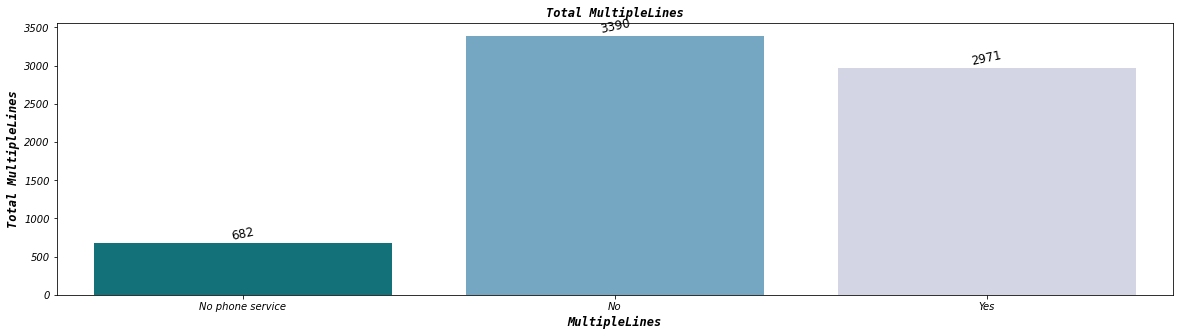

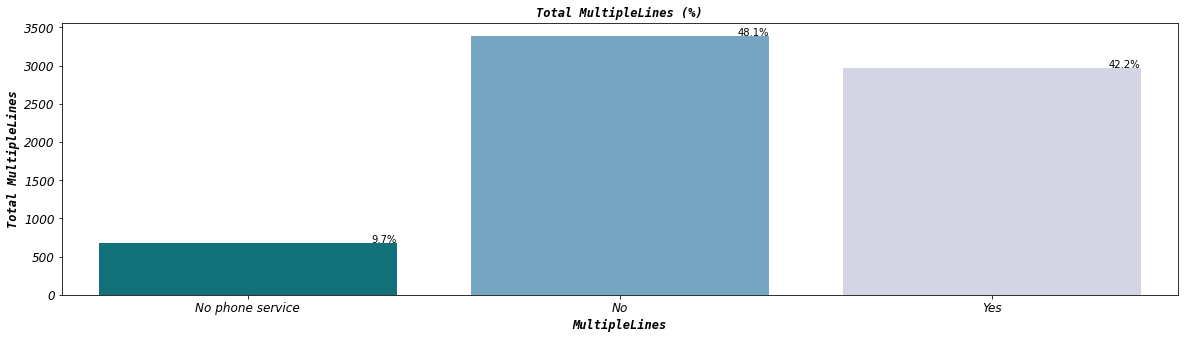

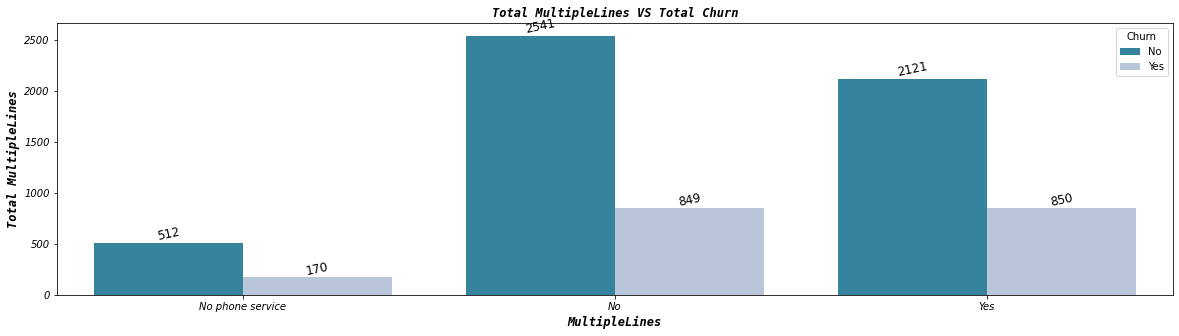

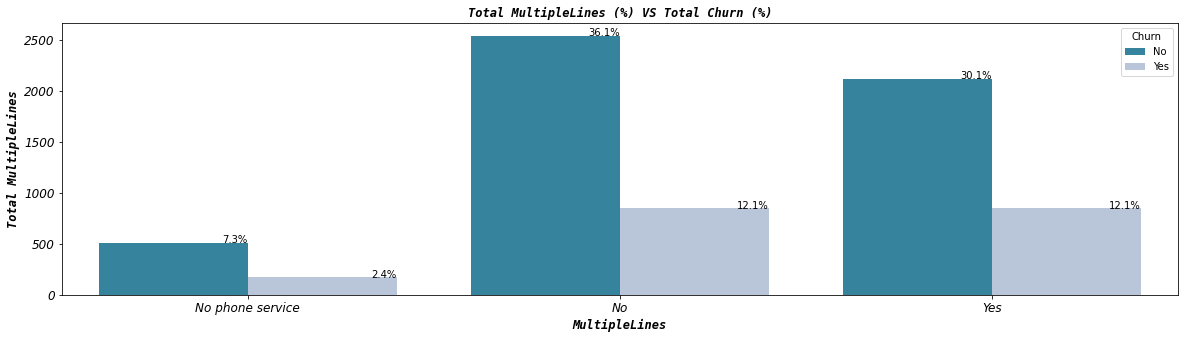

In [23]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='MultipleLines', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total MultipleLines',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('MultipleLines', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total MultipleLines', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="MultipleLines",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total MultipleLines (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('MultipleLines', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total MultipleLines', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='MultipleLines', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total MultipleLines VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('MultipleLines', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total MultipleLines', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="MultipleLines", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total MultipleLines (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('MultipleLines', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total MultipleLines', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Total pelanggan yang tidak menggunakan banyak jalur layanan telephone ada 3.990 dengan persentase 48.1% hal ini lebih banyak dari pada pelanggan yang menggunakan banyak jalur layanan telephone 2.971 dengan persentase 42.2% dan lebih tinggi dari pada pelanggan yang tidak menggunakan layanan telephone service 682 pelanggan dengan total persentase 9.7%
  - Pelanggan yang paling banyak masih menggunakan layanan jasa perusahaan ada dari pelanggan yang tidak banyak menggunakan layanan telephone dengan total pelanggan 2.541 atau dengan persentase 36.1% hal ini lebih tinggi dari pada pelanggan yang menggunakan layanan jalur telephone tambahan yaitu 2.121 dengan total persentase 30,1% dan pelanggan yang tidak menggunakan layanan telephone 512 pelanggan atau setara dengan 7.3%.
  - Pelanggan yang berhenti menggunakan layanan perusahaan memiliki keseimbangan persentase yaitu pelanggan yang menggunakan jalur layanan telephone tambahan memiliki persentase seimbang dengan pelanggan yang tidak menggunakan jalur layanan tembahan untuk telephone mereka dengan total persentase 12,1% sedangkan pelanggan yang tidak menggunakan layanan telephone ini jauh lebih rendah tingkat berhentinya menggunakan layanan jasa perusahaan hanya 2,4%.

#### InternetService

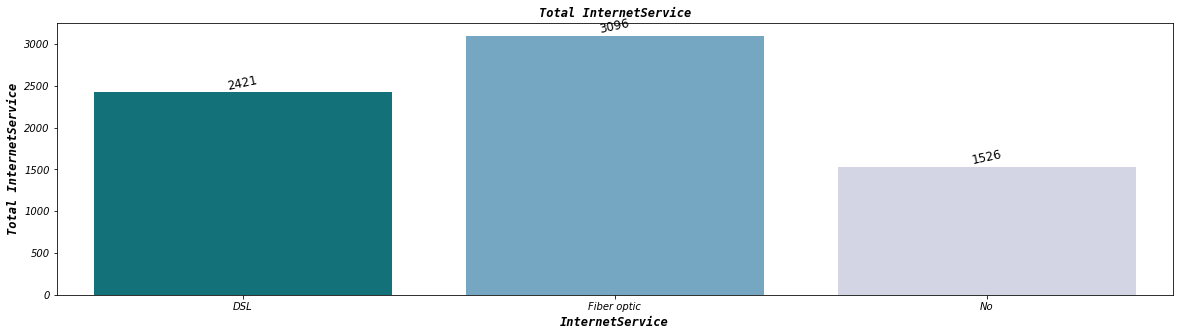

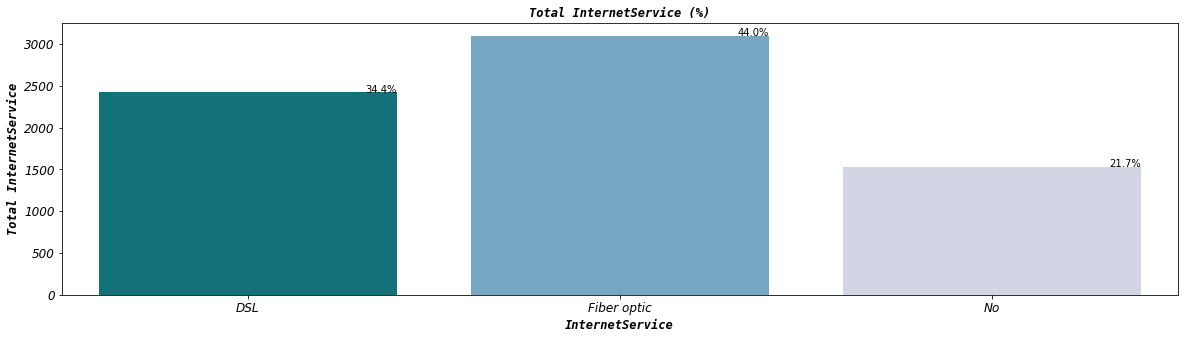

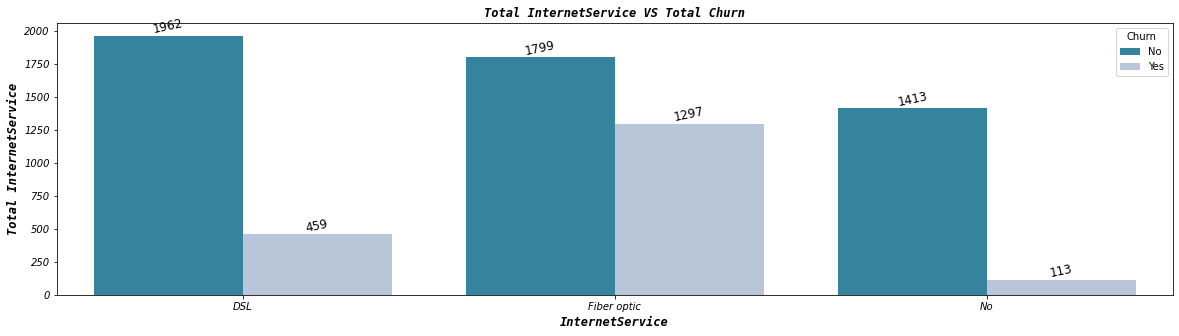

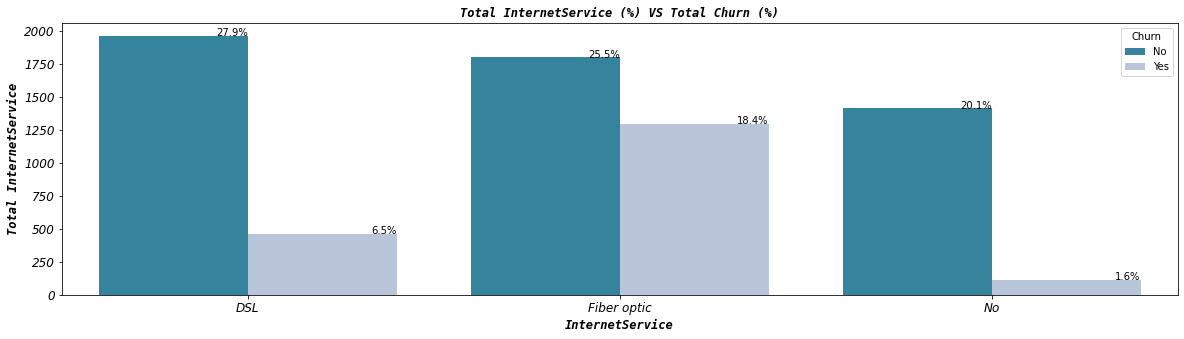

In [24]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='InternetService', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total InternetService',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('InternetService', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total InternetService', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="InternetService",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total InternetService (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('InternetService', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total InternetService', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='InternetService', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total InternetService VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('InternetService', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total InternetService', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="InternetService", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total InternetService (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('InternetService', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total InternetService', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Banyak pelanggan yang menggunakan layanan internet dari jaringan `fiber optic` dengan total 3.096 atau setara 44%, layanan internet kedua paling banyak digunakan pelanggan ada pada `DSL` dengan total pelanggan 2.421 atau setara dengan 34,4% dan pelanggan yang tidak menggunakan layanan internet ada sebanyak 1.526 atau setara dengan 21,7%
  - Pelanggan yang paling banyak bertahan ada dari pengguna layanan jaringan internet `DSL` dengan total pelanggan bertahan 1.962 atau setara dengan 27,9% sedangkan pelanggan yang menggunakan jaringan `Fiber Optic` sebanyak 1.799 atau setara dengan 18,4% yang masih menggunakan layanan internet dan pelanggan yang tidak menggunakan layanan internet memiliki total pelanggan bertahan 1.413 atau setara dengan 20,1% pelanggan bertahan
  - Pelanggan yang paling banyak berhenti menggunakan layanan perusahaan berasal dari pengguna jaringan internet `Fiber Optic` sebanyak 1.297 pelanggan dengan total persentase 18,4% sedangkan pelanggan yang menggunakan jaringan internet `DSL` ada total 459 pelanggan dengan total persentase 6,5% dan pelanggan yang tidak menggunakan layanan internet yang berhenti menggunakan layanan perusahaan hanya 113 orang pelanggan dengan total persentase 1.6%.

#### OnlineSecurity

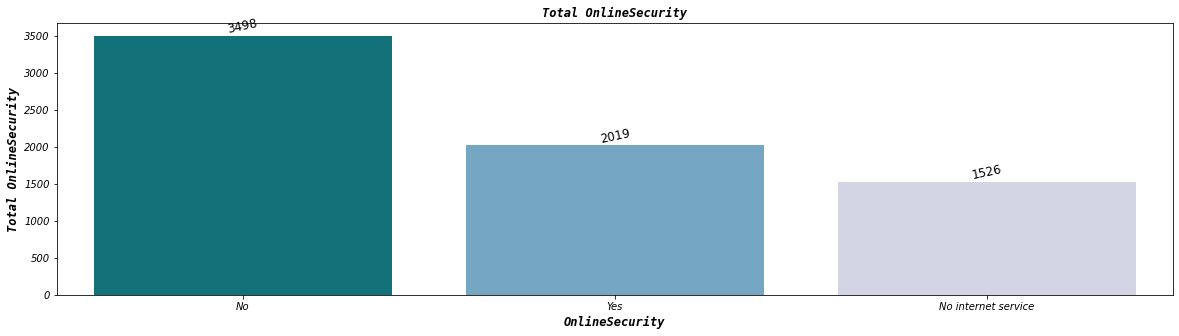

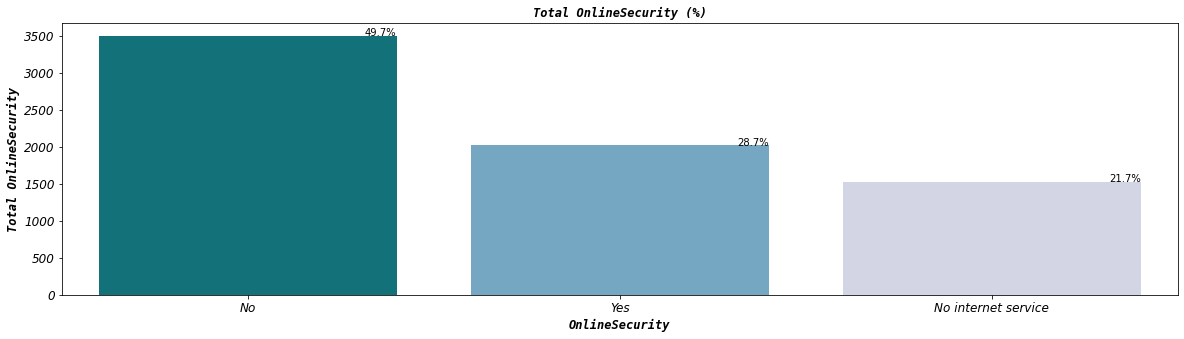

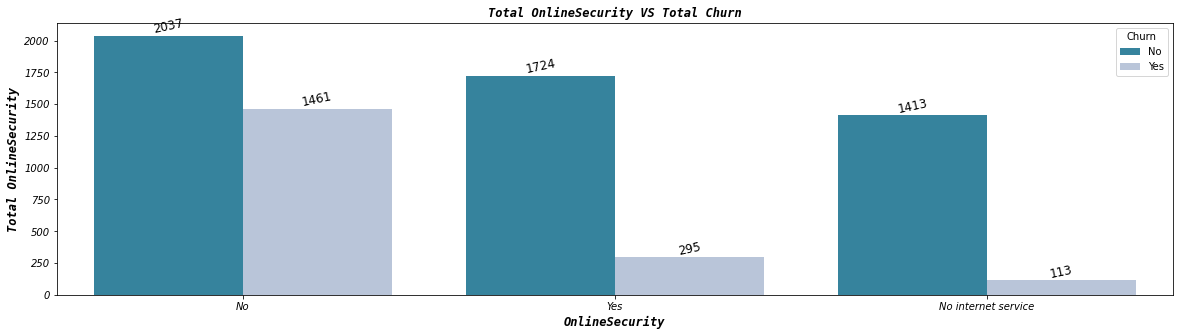

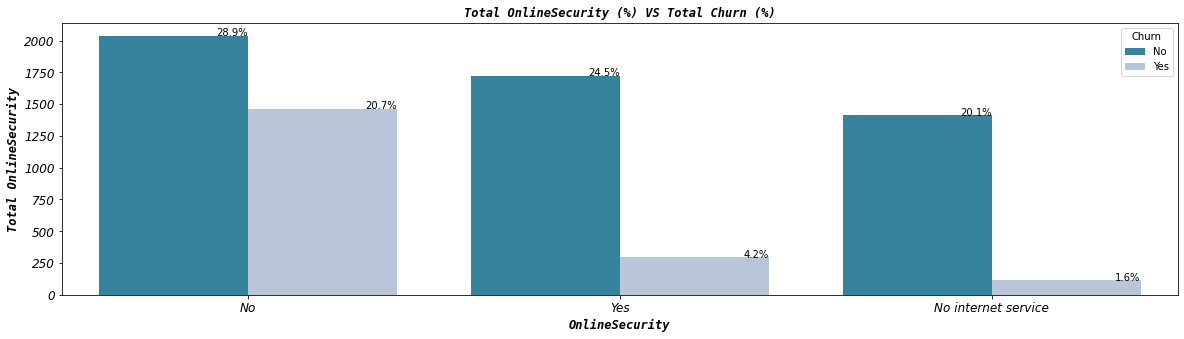

In [25]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='OnlineSecurity', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total OnlineSecurity',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('OnlineSecurity', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total OnlineSecurity', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="OnlineSecurity",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total OnlineSecurity (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('OnlineSecurity', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total OnlineSecurity', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='OnlineSecurity', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total OnlineSecurity VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('OnlineSecurity', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total OnlineSecurity', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="OnlineSecurity", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total OnlineSecurity (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('OnlineSecurity', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total OnlineSecurity', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Paling banyak pelanggan tidak menggunakan layanan keamanan jaringan internet 3.498 atau setara dengan 49,7%, pelanggan yang menggunakan layanan keamanan internet tambahan ada 2.019 atau setara dengan 28,7% dan pelanggan yang tidak menggunakan layanan keamanan internet dan tidak menggunakan layanan internet ada 1.526 atau setara dengan 21.7%.
  - Pelanggan yang tidak menggunakan layanan tambahan internet paling banyak bertahan dengan total pelanggan 2.037 atau setara dengan 28,9% hal ini lebih tinggi dari pada pelanggan yang menggunakan layanan internet tambahan yaitu 1.724 pelanggan atau setara dengan 24.5% dan pelanggan yang tidak menggunakan tambahan layanan keamanan internet dari pelanggan yang tidak menggunakan internet 1.413 dengan total persentase 20,1%
  - Pelanggan yang berhenti menggunakan layanan perusahaan banyak bersumber dari pelanggan yang tidak menggunakan layanan internet tambahan sebanyak 20,7% dengan jumlah pelanggan 1.461, hal ini lebih tinggi dari pada pelanggan yang menggunakan layanan keamanaan tambahan sebanyak 295 orang atau setara dengan 4.2% dan pelanggan yang tidak menggunakan layanan internet berhenti sebanyak 113 atau setara dengan 1,6%. 

#### OnlineBackup

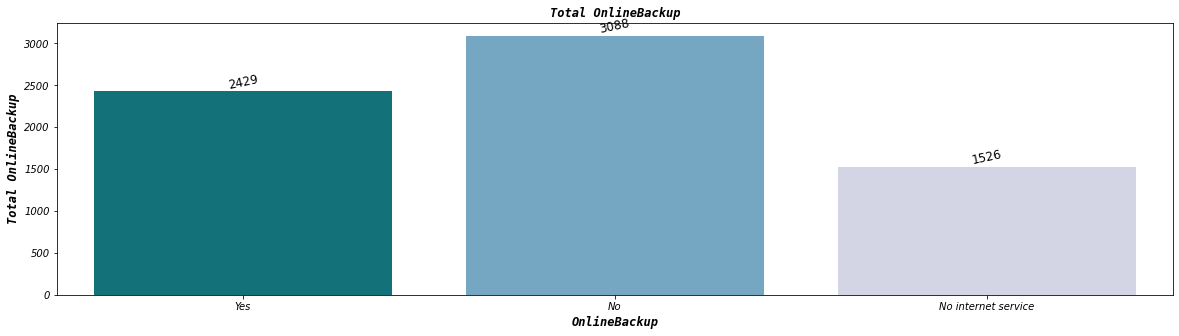

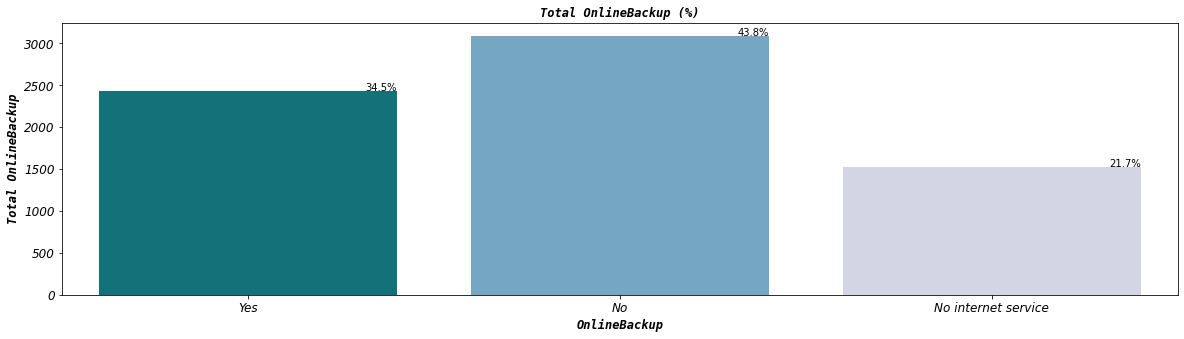

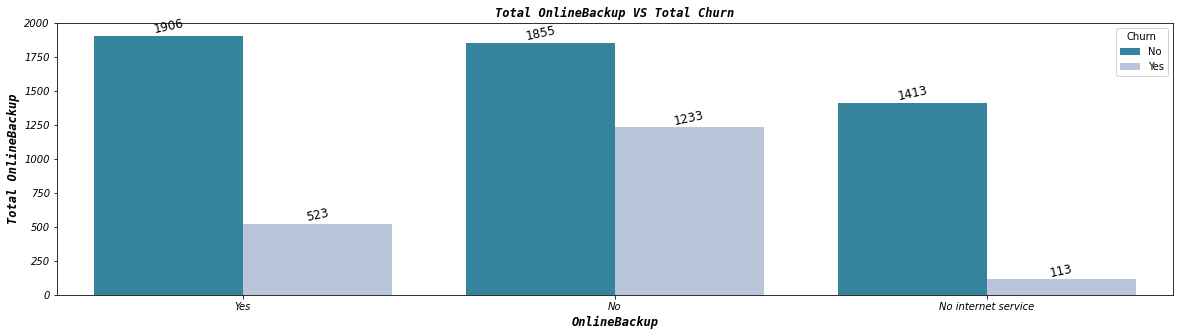

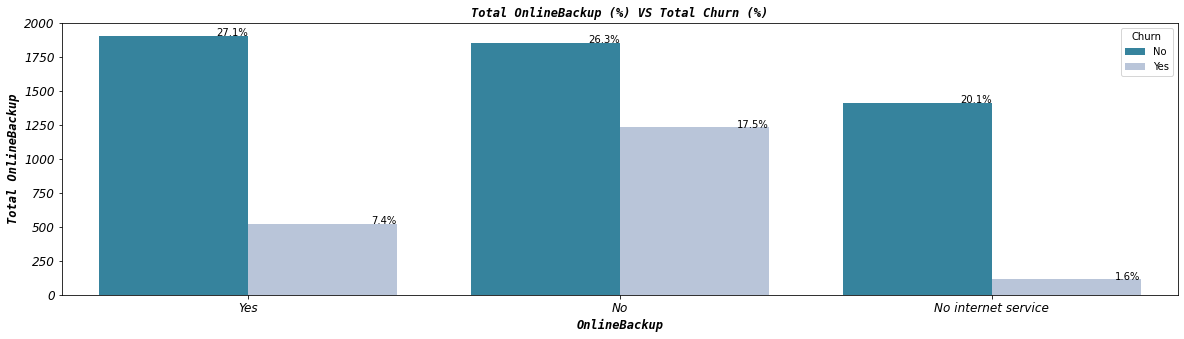

In [26]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='OnlineBackup', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total OnlineBackup',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('OnlineBackup', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total OnlineBackup', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="OnlineBackup",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total OnlineBackup (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('OnlineBackup', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total OnlineBackup', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='OnlineBackup', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total OnlineBackup VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('OnlineBackup', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total OnlineBackup', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="OnlineBackup", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total OnlineBackup (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('OnlineBackup', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total OnlineBackup', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
    -	Pelanggan yang banyak berhenti menggunakan layanan perusahan bersumber dari pelanggan yang tidak menggunakan layanan backup data onle sebanyak 3.088 atau setara dengan 45.8%, hal ini lebih tinggi dari pada pelanggan yang menggunakan layanan backup online tambahan yaitu 2.429 dan setara dengan 34.5% dan hal ini lebih tinggi juga dari pada 1.526 atau setara dengan 21.7%
    -	Pelanggan yang masih menggunakan layanan jasa perusahaan ada dari pelanggan yang menggunakan layanan backup data online tambahan sebanyak 1.906 sedangkan pelanggan yang tidak menggunakan layanan backup online tambahan masih menggunakan layanan perusahaan namun lebih rendah total pelanggannya yaitu 1.855 27,1%dan pelanggan yang tidak menggunakan layanan internet ada pada peringkat tertinggi yang masih menggunakan layanan jasa perusahaan dengan total persentase 1.413 dengan total persentase 26.3% dengan total persentase 20,1%.
    -	Pelanggan yang berhenti menggunakan layanan jasa perusahaan ada dari pelanggan yang tidak menggunakan layanan backup online tambahan dengan total 1.233 atau setara dengan 17,5%, pelanggan yang menggunakan layanan backup data online memiliki tingkat berhenti berlangganan lebih rendah yaitu 523 pelanggan atau setara dengan 7,4% dan pelanggan yang tidak menggunakan layanan internet ada sebanyak 113 pelanggan dengan total persentase 1,6%.

#### DeviceProtection

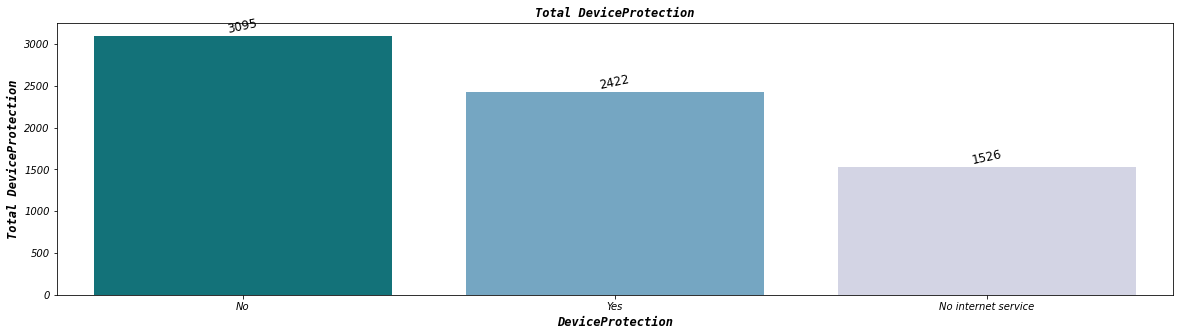

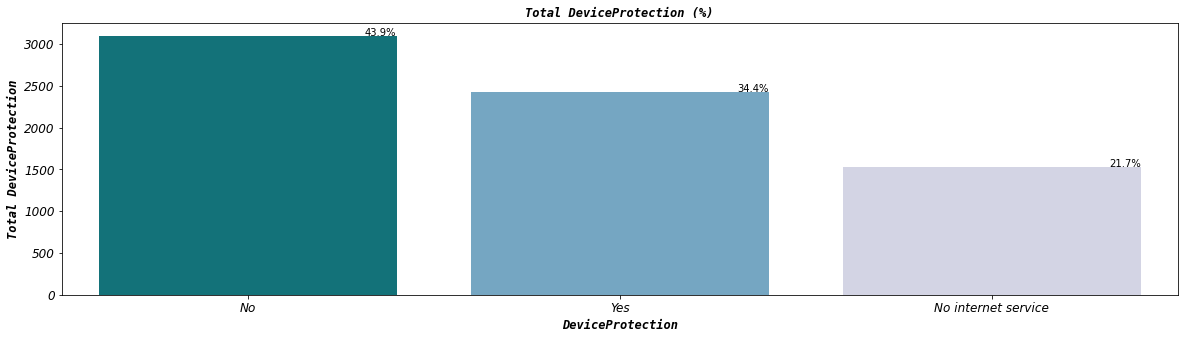

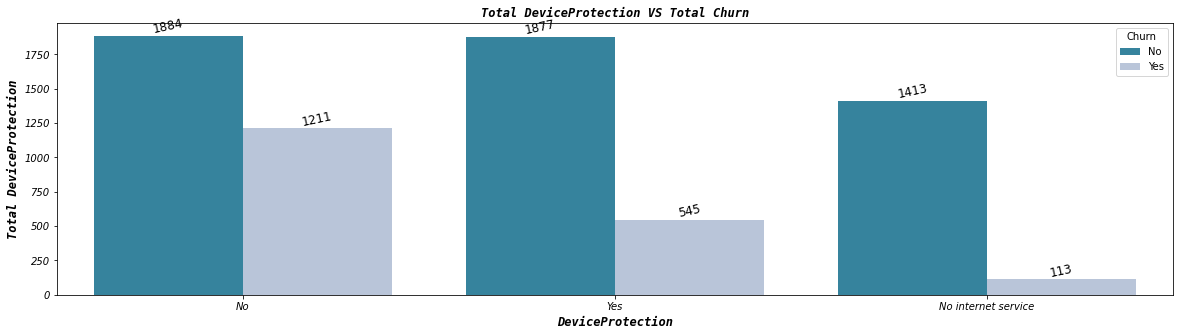

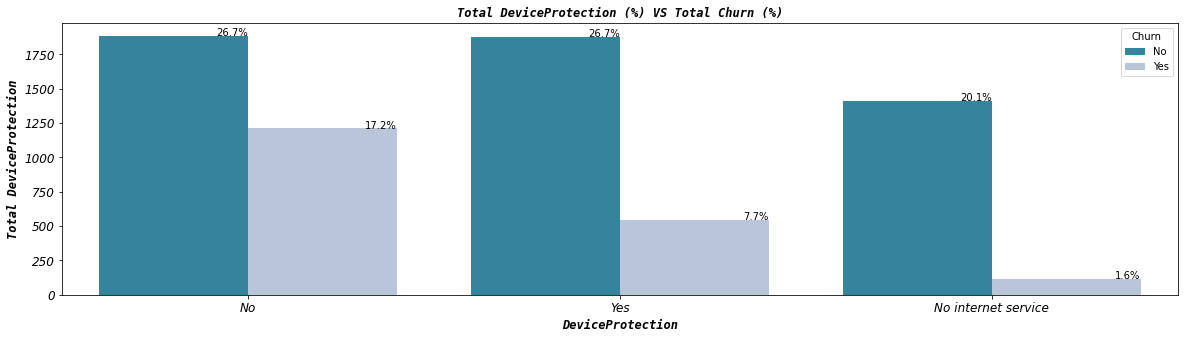

In [27]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='DeviceProtection', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total DeviceProtection',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('DeviceProtection', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total DeviceProtection', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="DeviceProtection",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total DeviceProtection (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('DeviceProtection', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total DeviceProtection', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='DeviceProtection', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total DeviceProtection VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('DeviceProtection', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total DeviceProtection', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="DeviceProtection", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total DeviceProtection (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('DeviceProtection', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total DeviceProtection', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Pelanggan yang tidak menggunakan keamanan perangkat lebih tinggi total pelanggannya dengan total 3.095 dengan total persentase 43.9% sedangkan pelanggan yang menggunakan keamanaan tambahan ada pada 2.422 ada dengan total persentase 34.4% dan pelanggan yang tidak menggunakan layanan keamanan perangkat dan tidak menggunakan layanan internet berjumlah dengan 1.526 ada dengan total persentase 21,7%.
  - Pelanggan yang paling banyak masih menjadi pelanggan perusahaan ada dari pelanggan yang tidak menggunakan layanan keamanan tambahan sebanyak 1.884 pelanggan dengan persentase 26,7%  hal ini berbeda tipis dengan pelanggan yang bertahan menggunakan layanan jasa perusahaan pada pelanggan yang menggunakan layanan tambahan keamanan dengan total pelanggan 1.877 atau setara dengan 26.7% dan pelanggan yang masih bertahan menggunakan layanan jasa perusahaan diperingkat ketiga ada pada pelanggan yang tidak menggunakan jasa layanan internet sebanyak 1.413 atau setara dengan 20.1%.
  - Pelanggan yang banyak berhenti menggunakan layanan perusahaan banyak dari pelangan yang tidak menggunakan keamanan tambahan pada perangkan sebanyak 1.211 pelangggan setara dengan 17.2% dan hal ini memiliki selisih jauh jika dibandingkan dengan pelanggan yang menggunakan keamanan tambahan pada perangkatnya 545 atau setara dengan 7.7% dan pelanggan yang tidak menggunakan jaringan internet 113 atau setara dengan 1.6%


#### TechSupport

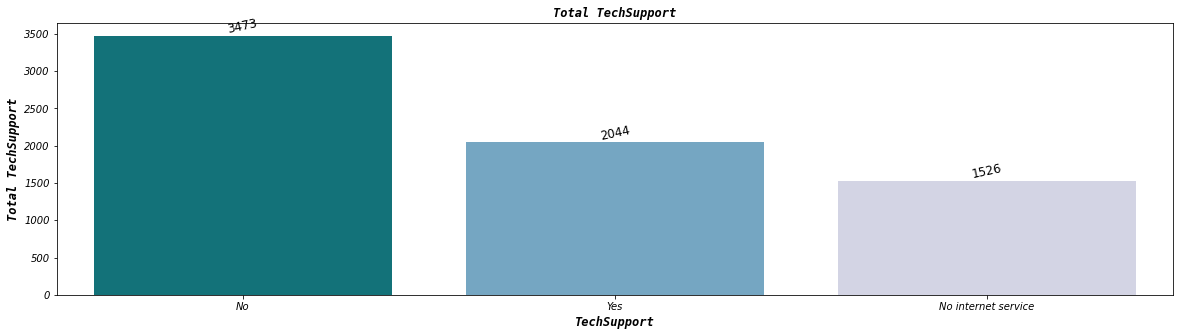

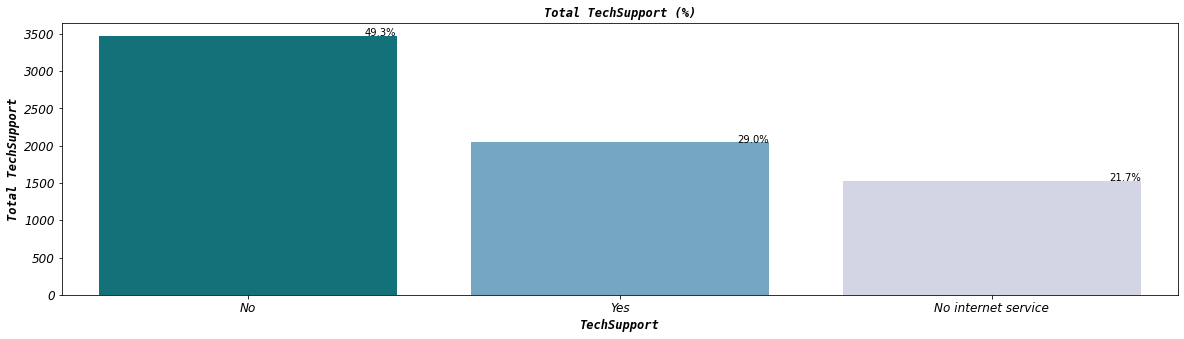

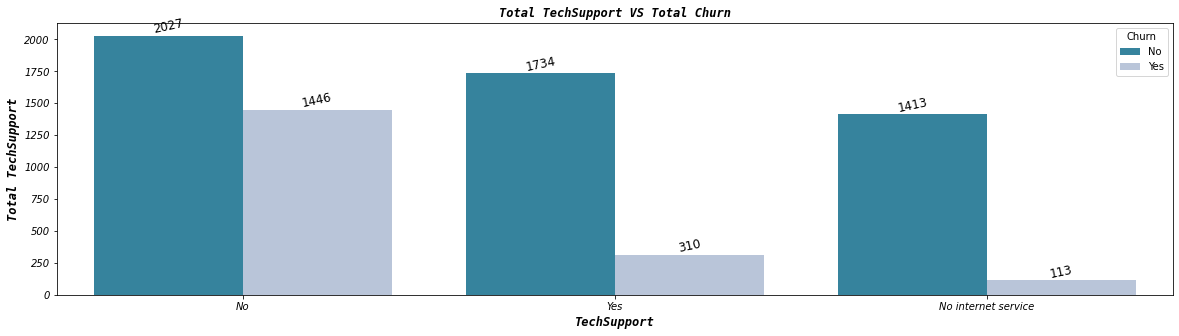

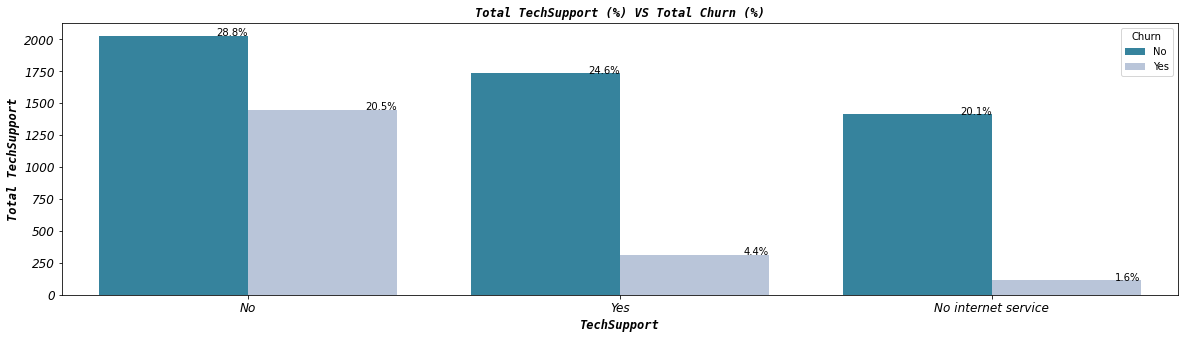

In [28]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='TechSupport', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total TechSupport',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('TechSupport', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total TechSupport', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="TechSupport",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total TechSupport (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('TechSupport', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total TechSupport', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='TechSupport', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total TechSupport VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('TechSupport', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total TechSupport', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="TechSupport", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total TechSupport (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('TechSupport', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total TechSupport', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
- Pelanggan yang tidak menggunakan layanan tambahan dukungan teknis lebih banyak 3.473  setara dengan 49,3% dibandingkan pelanggan yang menggunakan dukungan layanan teknis dengan total 2.044 setara dengan 29% dan pelanggan yang tidak menggunakan jaringan internet dengan total 1.528 pelanggan dengan persentase 21,7%.
- Pelanggan yang masih bertahan menggunakan layanan jasa perusahaan paling banyak ada pada pelanggan yang tidak menggunakan tambahan layanan teknis sebanyak 2.027 dengan persentase 28.8% dan hal ini lebih tinggi dari pada pelanggan yang menggunakan layanan teknis sebanyak 1.734 pelanggan setara dengan 24.6% dan 1.413 berasal dari pelanggan yang tidak menggunakan layanan tambahan dukungan teknis dan layanan interenet setara dengan 20.1%
- Pelanggan yang berhenti berlangganan menggunakan layanan jasa perusahaan banyak berasal dari pelanggan yang tidak menggunakan jasa tambahan teknis sebanyak 1.446 setara dengan 20.5% hal ini lebih tinggi dari pada pelanggan yang menggunakan tambahan layanan teknis sebanyak 310 pelanggan atau setara dengan 4.4% dan pelanggan yang tidak menggunakan tambahan layanan teknis dan pelanggan yang tidak menggunakan internet sebanyak 113 pelanggan dengan total persentase 1.6%.

#### StreamingTV

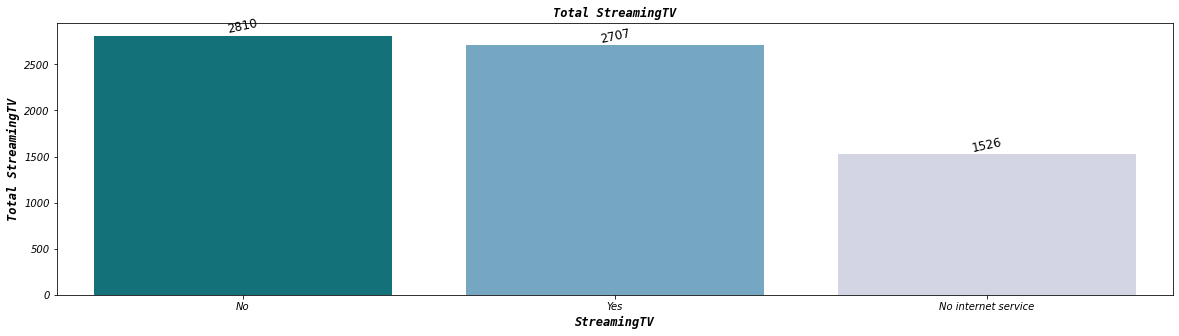

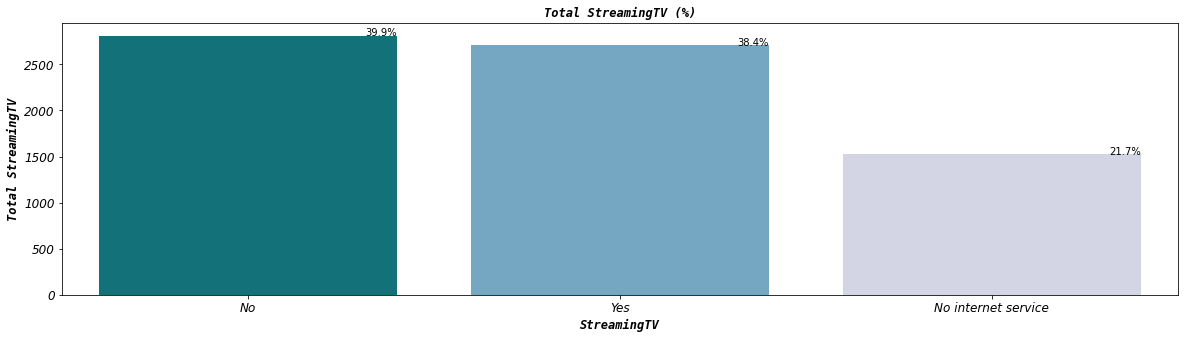

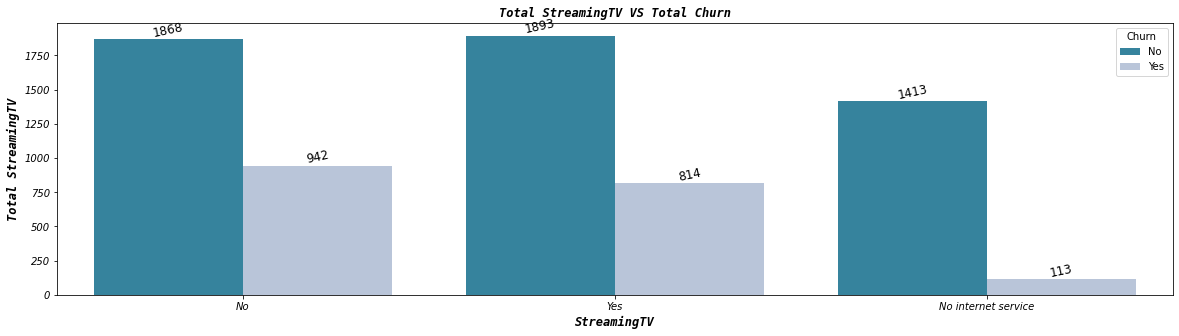

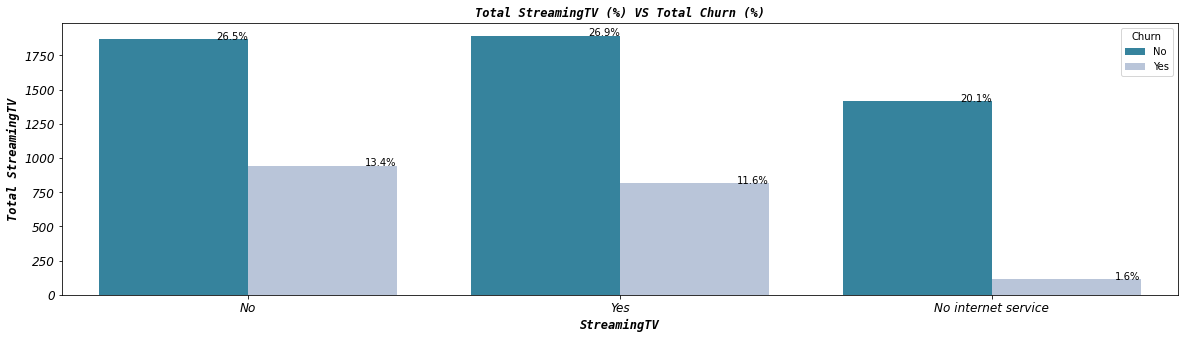

In [29]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='StreamingTV', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total StreamingTV',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('StreamingTV', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total StreamingTV', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="StreamingTV",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total StreamingTV (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('StreamingTV', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total StreamingTV', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='StreamingTV', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total StreamingTV VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('StreamingTV', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total StreamingTV', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="StreamingTV", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total StreamingTV (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('StreamingTV', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total StreamingTV', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Pelanggan yang tidak menggunakan layanan jasa internet untuk kebutuhan streaming tv sebanyak 2.810 setara dengan 39.9% hal ini lebih tinggi dari pada pelanggan yang menggunakan layanan jasa internet untuk kebutuhan streaming tv sebanyak 2.707 pelanggan dengan total persentase 38.4% dan pelanggan yang tidak menggunakan layanan internet sebanyak 1.526 pelanggan dengan persentase 21,7%.
  -	Pelanggan yang masih menggunakan jasa perusahaan paling banyak dari pelanggan yang menggunakan layanan internet untuk straming tv sebanyak 1.893 dengan total persentase 26.9% sedangkan pelanggan yang masih menggunakan jasa layanan perusahaan namun tidak untuk kebutuhan straming tv sebanyak 1.868 dengan total persentase 26.5% dan pelanggan yang tidak menggunakan internet namun masih menggunakan layanan jasa perusahaan sebanyak 1.413 dengan total persentase 20.1%.
  - Pelanggan yang berhenti menggunakan layanan perusahaan banyak dari pelanggan  yang berasal dari pelanggan yang tidak menggunakan layanan streaming tv sebanyak 942 setara dengan 13.4%, sedangkan pelanggan yang menggunakan layanan internet untuk streaming tv berhenti berlanggan menggunakan jasa perusahaan hanya 814 pelanggan dengan persentase 11,6% dan pelanggan yang yang berhenti mennjadi pelanggan dengan tidak menggunakan layanan internet jauh lebih sedikit hanya 113 orang setara dengan 1,6%.


#### StreamingMovies

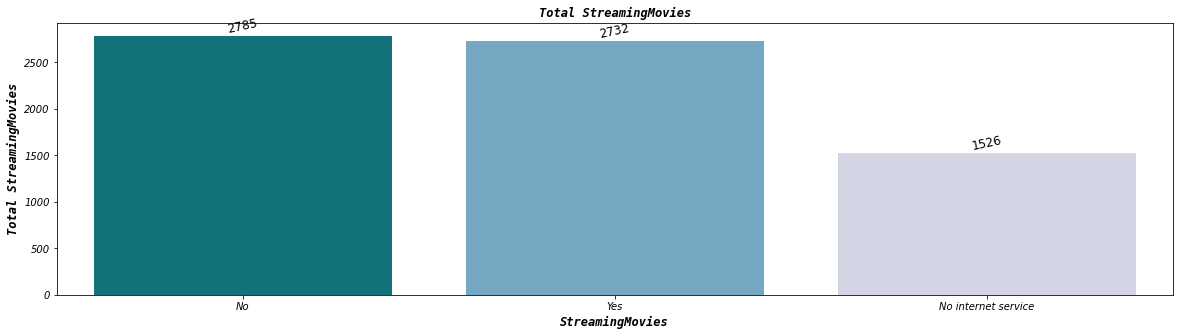

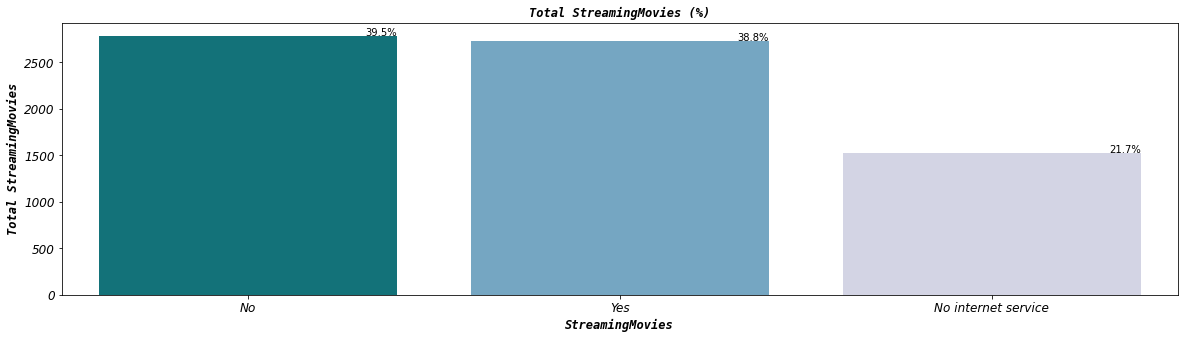

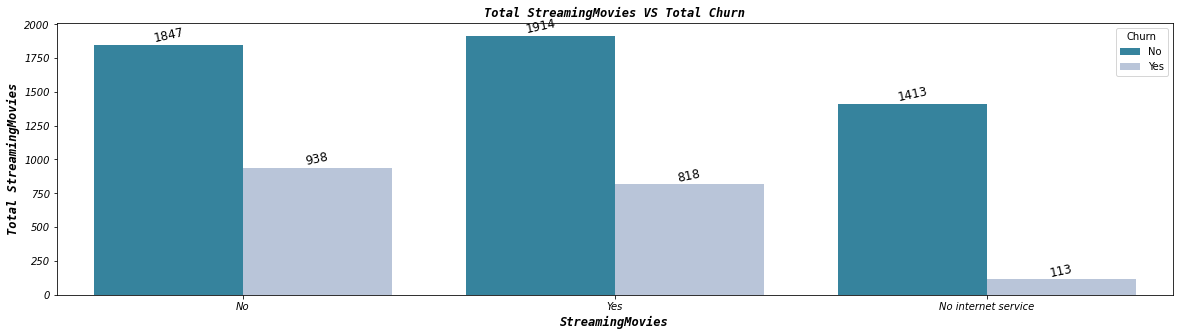

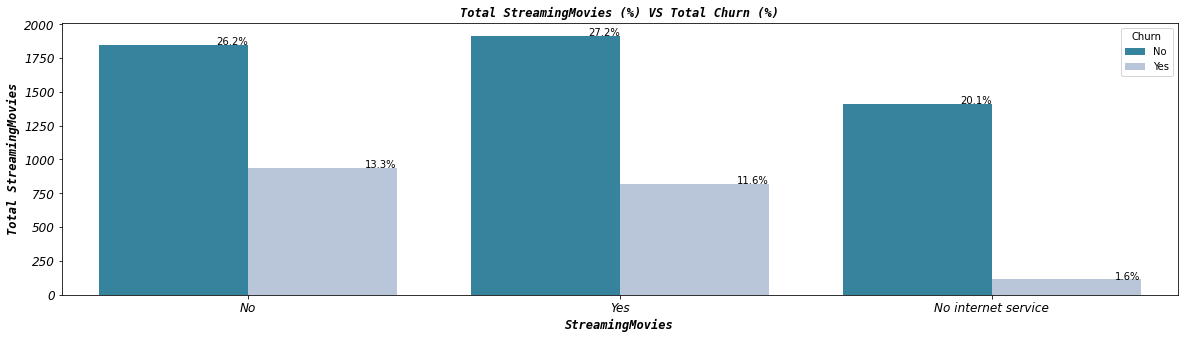

In [30]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='StreamingMovies', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total StreamingMovies',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('StreamingMovies', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total StreamingMovies', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="StreamingMovies",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total StreamingMovies (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('StreamingMovies', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total StreamingMovies', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='StreamingMovies', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total StreamingMovies VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('StreamingMovies', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total StreamingMovies', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="StreamingMovies", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total StreamingMovies (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('StreamingMovies', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total StreamingMovies', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Sebanyak 2.785 atau setara dengan 39.5% pelanggan menggunakan layanan internet namun tidak untuk digunakan pada straming movies, sedangkan ada 2.732 pelanggan atau sekitar 38.8% pelanggan menggunakan internet untuk straming movies dan ada 1.526 pelanggan atau setara dengan 21.7% pelanggan tidak menggunakan layanan internet dan layanan straming movies
  - Ada sebanyak 1.914 atau 27.2% persen pelanggan masih menggunakan layanan internet perusahan untuk kebutuhan straming movies dan pelanggan yang tidak menggunakan layanan straming movies ada 1.847 atau setara dengan 26.2% persen dan ada 1.413 pelanggan dengan total persentase 20.1% yang tidak menggunakan layanan interent dan masih tetap menggunakan layanan lain perusahaan.
  - Namun pelanggan yang paling banyak berhenti berlanggan dengan jasa perusahaan berasal dari pelanggan yang tidak menggunakan layanan internet untuk kebutuhan streaming tv sebanyak 938 atau setara dengan 13.3% dibandingkan pelanggan yang menggunakan layanan internet untuk straming tv hanya sebanyak 818 pelanggan setara dengan 11,6% dan pelanggan yang sama sekali tindak menggunakan layanan internet dan memiliki tingkat berhenti lebih rendah yaitu hanya 113 pelanggan atau setara dengan 1,6%.


#### Contract

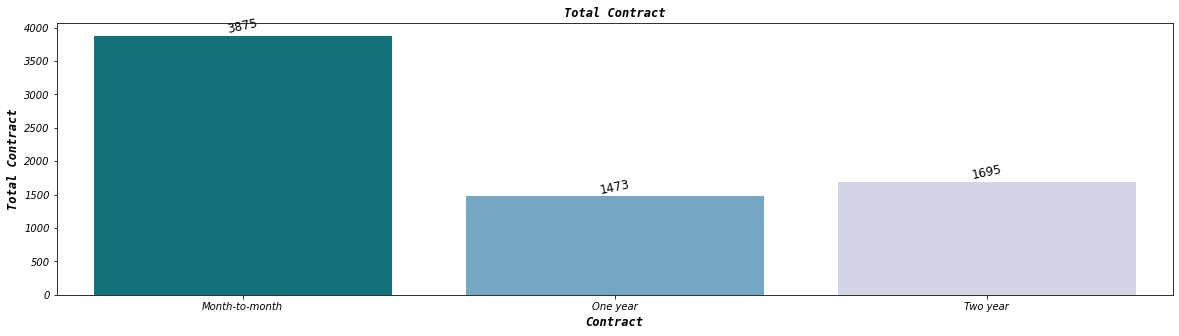

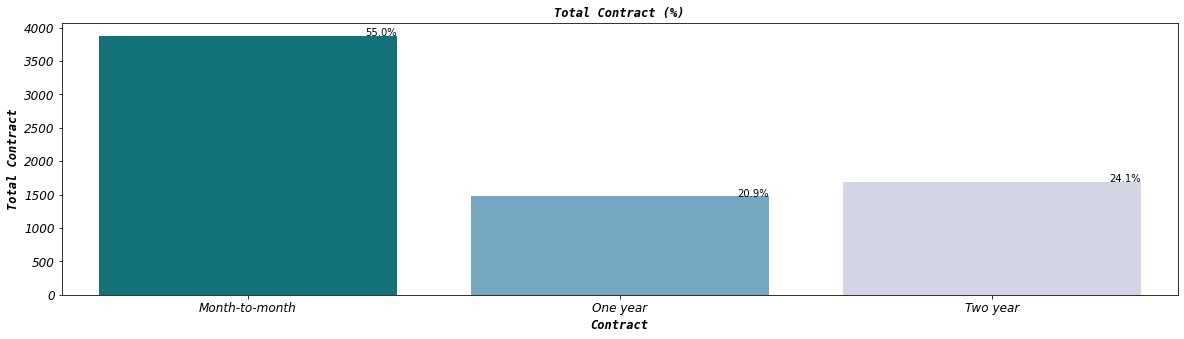

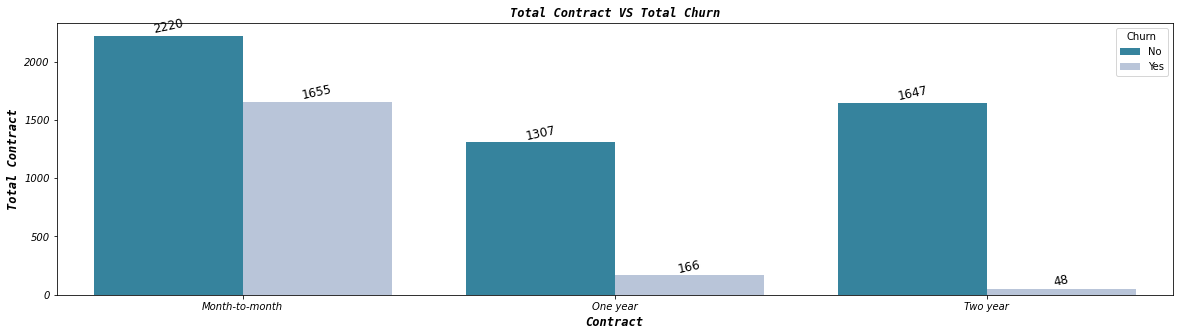

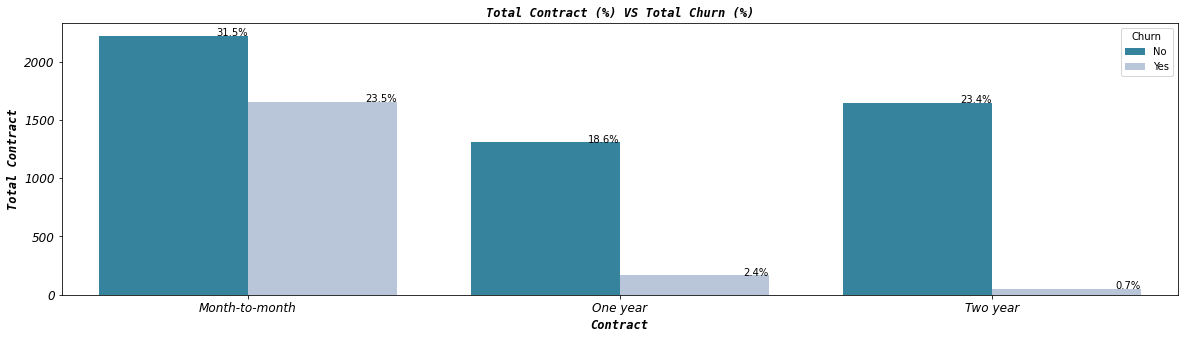

In [31]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Contract', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Contract',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Contract', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Contract', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="Contract",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Contract (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Contract', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Contract', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x='Contract', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Contract VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Contract', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Contract', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,5))
ax = sns.countplot(x="Contract", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Contract (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Contract', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Contract', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
    -	Pelanggan paling banyak menggunakan kontrak month to month sebanyak 3.875 atau setara dengan 55%, sedangkan pelanggan yang membayar kontrak 1 tahun langsung hanya 1.473 atau setara 20,9% dan pelanggan yang menggunakan kontrak 2 tahun ada 1.695 atau setara dengan 34,1%..
    -	Dari kontrak month to month paling banyak pelanggan masih menggunakan layanan jasa perusahaan sebanyak 2.220 pelanggan dengan total persentase 31.5% dan pelanggan yang masih menggunakan layanan perusahaan paling banyak kedua ada pada pelanggan yang kontrak 2 tahun sebanyak 1.647 atau setara dengan 23.4% dan pelanggan yang menggunakan layanan perusahaan dengan kontrak 1 tahun memiliki peringkat ketiga yang masih menggunakan layanan ini sebanyak 1.307 pelanggan setara dengan 18.6%
    -	Pelanggan yang tidak menggunakan layanan perusahaan lagi paling banyak dari pelanggan yang menggunakan kontrak month to month sebanyak 1.655 atau setara 23.5%, sedangkan pelanggan yang kontrak 1 tahun ini memiliki tingkat berhenti berlangganan lebih kecil yaitu 166 pelanggan atau setara dengan 2.4% dan pelanggan yang kontrak 2 tahun memiliki tingkat berhenti berlangganan paling kecil sebanyak 48 pelanggan atau 0.7%

#### PaperlessBilling

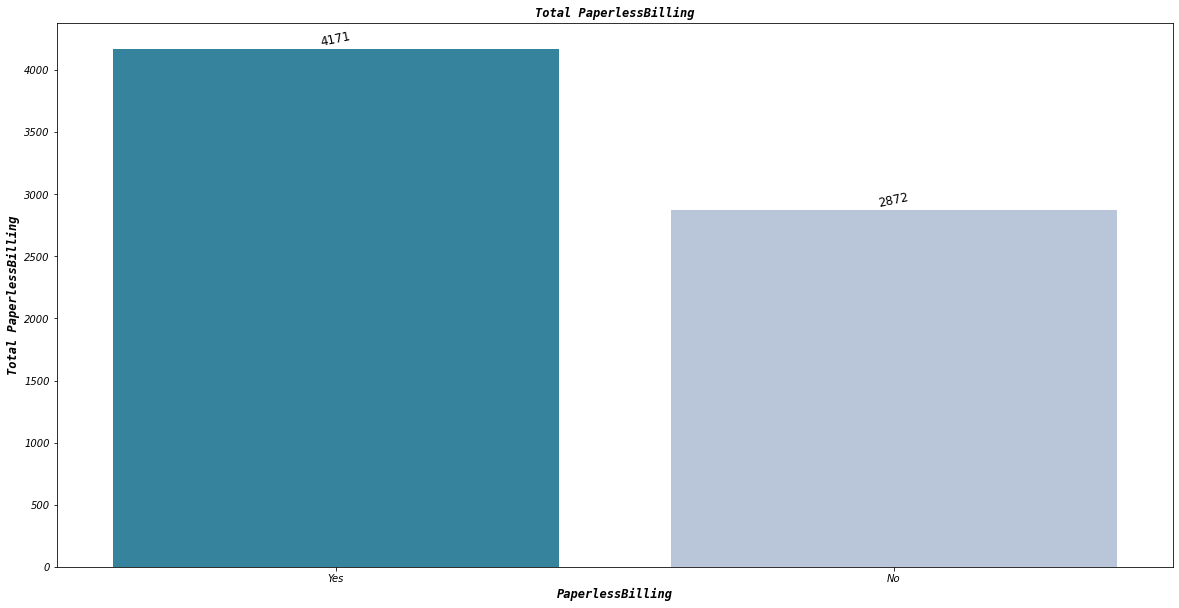

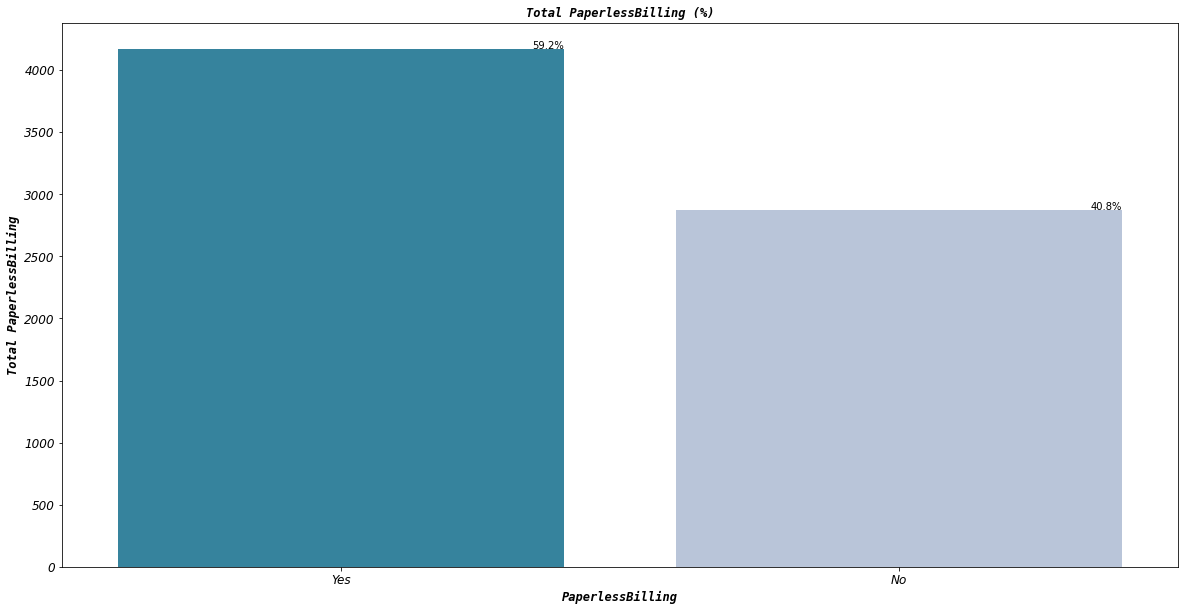

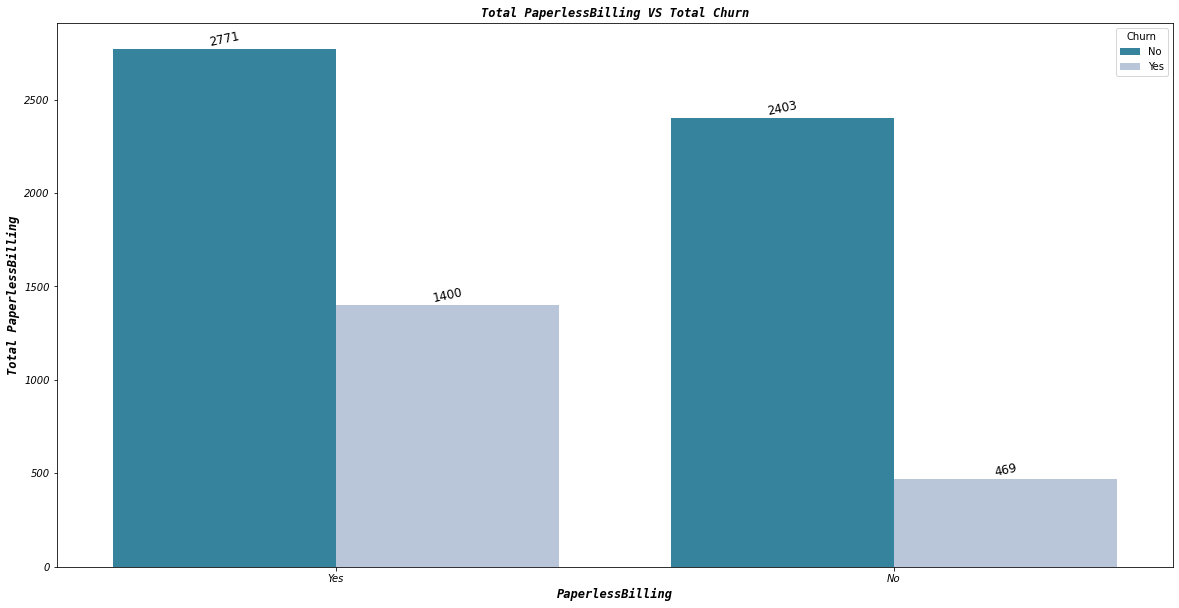

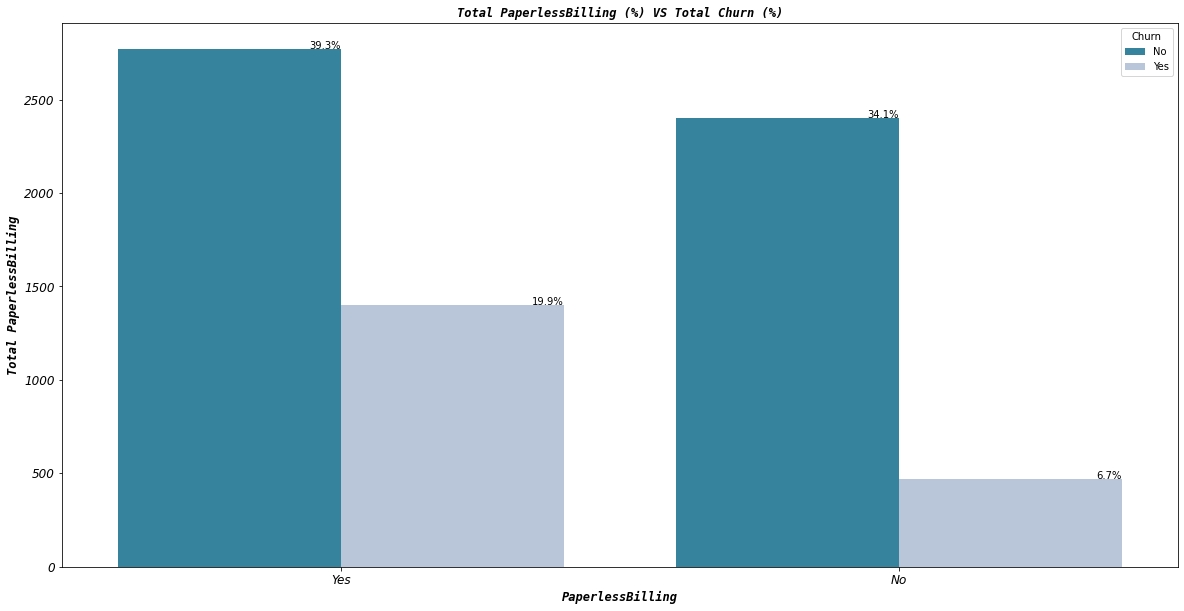

In [32]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='PaperlessBilling', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total PaperlessBilling',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('PaperlessBilling', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total PaperlessBilling', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,10))
ax = sns.countplot(x="PaperlessBilling",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total PaperlessBilling (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('PaperlessBilling', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total PaperlessBilling', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,10))
ax = sns.countplot(x='PaperlessBilling', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total PaperlessBilling VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('PaperlessBilling', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total PaperlessBilling', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,10))
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total PaperlessBilling (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('PaperlessBilling', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total PaperlessBilling', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Pelanggan yang menerima kertas bukti pembayaran sebanyak 4.171 atau setara dengan 59.2% sedangkan pelanggan yang tidak menerima kertas bukti pembayaran 2.872 atau setara dengan 40.8%
  - Pelanggan yang banyak berhenti berlangganan berasal dari pelanggan yang menerima kertas bukti pembayaran sebanyak 19.9% atau setara dengan 1.400 pelanggan dari pada pelanggan yang tidak menerima kertas bukti pembayaran 469 pelanggan atau setara dengan 6.7%
  - Namun pelanggan yang paling banyak masih menggunakan layanan perusahaan berasal dari pelanggan yang menerima kertas bukti pembayaran sebanyak 2.771 pelanggan setara dengan 39.3% persen dan pelanggan yang tidak menerima bukti pembayaran ada 2.403 pelanggan setara dengan 34.1% pelanggan yang masih bertahan menggunakan layanan perusahaan.

#### PaymentMethod

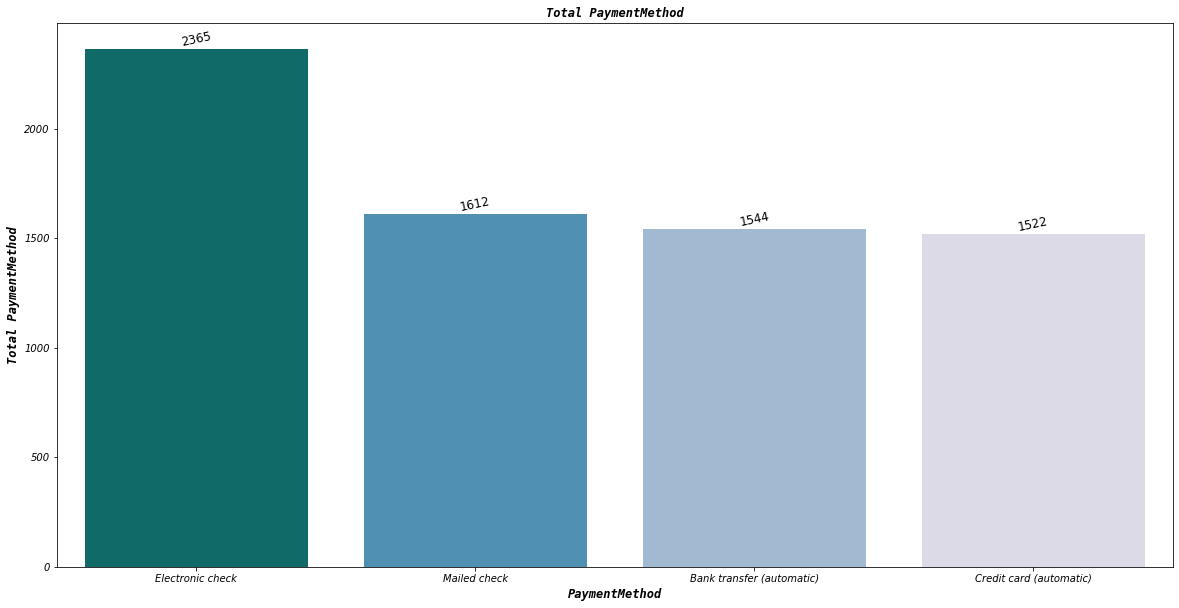

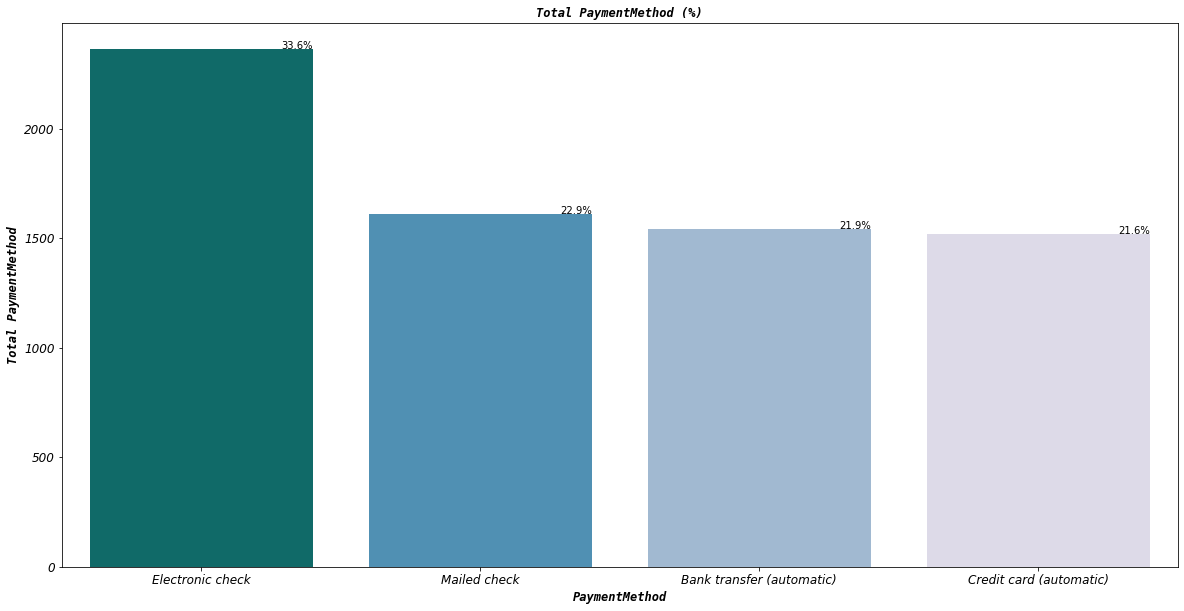

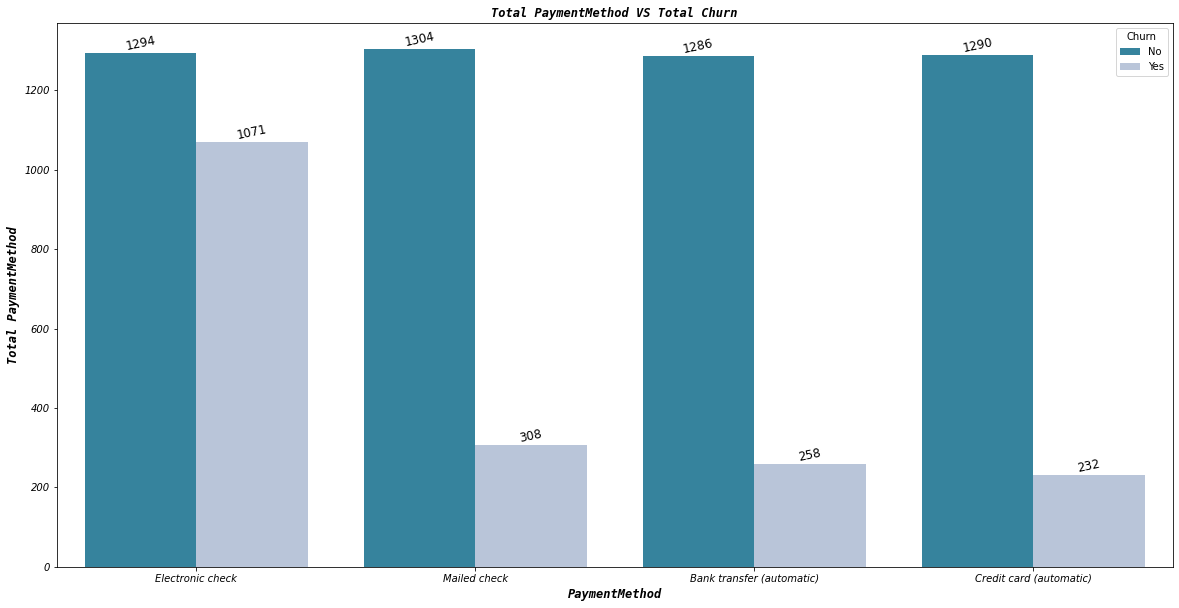

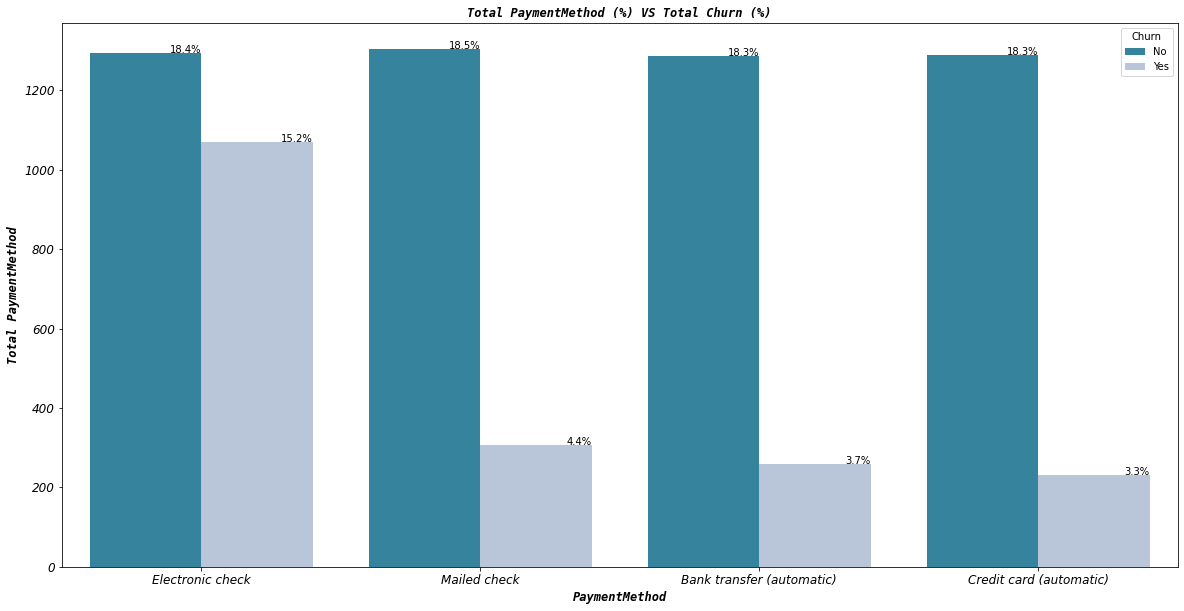

In [33]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='PaymentMethod', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total PaymentMethod',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('PaymentMethod', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total PaymentMethod', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,10))
ax = sns.countplot(x="PaymentMethod",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total PaymentMethod (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('PaymentMethod', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total PaymentMethod', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(20,10))
ax = sns.countplot(x='PaymentMethod', data=df, hue="Churn", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total PaymentMethod VS Total Churn',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('PaymentMethod', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total PaymentMethod', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=12,rotation=12, horizontalalignment='left')
plt.show()

plt.figure(figsize=(20,10))
ax = sns.countplot(x="PaymentMethod", hue="Churn", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total PaymentMethod (%) VS Total Churn (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('PaymentMethod', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total PaymentMethod', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- insight :
  - Pelanggan yang menggunakan electronic chek lebih banyak 2.365 orang atau setara 33.6% dibandingkan pelanggan yang menggunakan malled check 22,9% dan bank tranfer (automatic) dan credit card (automatic) yang berkisar 21%.
  - Namun pelanggan yang masih berlangganan dengan layanan perusahaan baik itu menggunakan elektronic check, mailed check, bank tranfer (automatic) dan credit card (automatic) memiliki persentase masih berkisar 18%-an.
  - Hal ini berbeda dengan pelanggan yang memilih berhenti menggunakan pelayanan jasa perusahaan berasal dari pelanggan yang melakukan pembayaran dengan elektronic check sebanyak 1.071 pelanggan atau setara 15.2% sedangkan pelanggan yang melakukan pembayaran dengan mailed check memiliki tingkat berhenti menjadi pelanggan sebanyak 4,4% atau sebanyak 308 dan untuk penggunaan bank tranfer dan credit card memiliki persentase yang terus menurun tingkat berhentinya yaitu dari bank tranfer 3,7% dan dengan menggunakan credit card lebih rendah 3.3%

#### TotalCharges

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


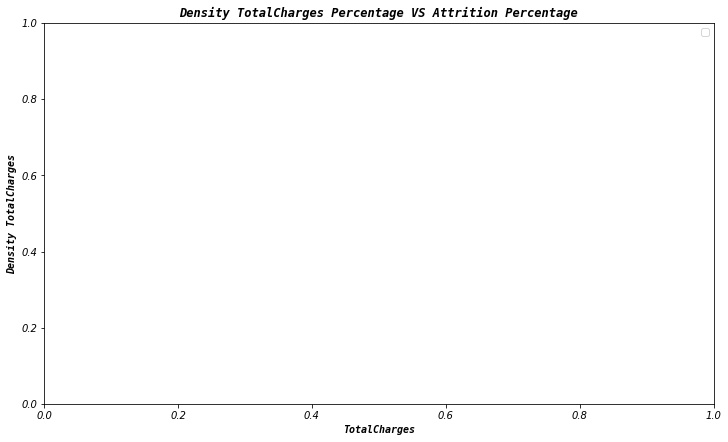

In [34]:
plt.figure(figsize=(12,7))
df_yes=df[df[ 'Churn']==1]['TotalCharges'] 
df_no=df[df[ 'Churn']==0]['TotalCharges'] 
sns.kdeplot(df_yes, label = 'Pelanggan Churn', shade = True, color = 'r',fill=True)
sns.kdeplot(df_no, label = 'Pelanggan Tidak Churn', shade = True, color = 'b', fill=True)
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Density TotalCharges Percentage VS Attrition Percentage',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('TotalCharges', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density TotalCharges', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Pelanggan yang berhenti berlangganan menggunakan layanan perusahaan banyak dari pelanggan yang total pembayarannya kurang dari 2.000 USD sedangkan pelanggan yang biaya pembayaran lebih dari 2.000 USD lebih banyak masih menggunakan layanan perusahaan.

In [35]:
df.to_csv("Visualization Tableau Customer Churn.csv")

# **4. MACHINE LEARNING**

### **Feature Selection**

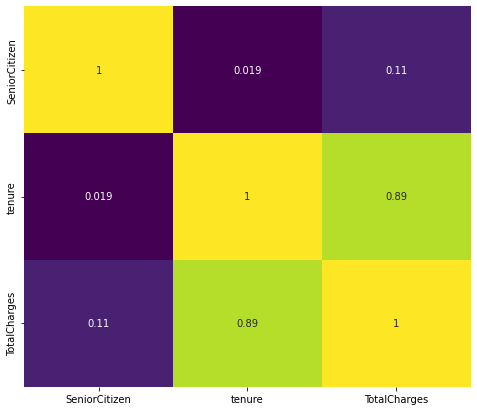

In [ ]:
plt.figure(figsize=(8, 7))
sns.heatmap(df.corr('spearman'), cmap='viridis', cbar=False, annot=True)
plt.show()

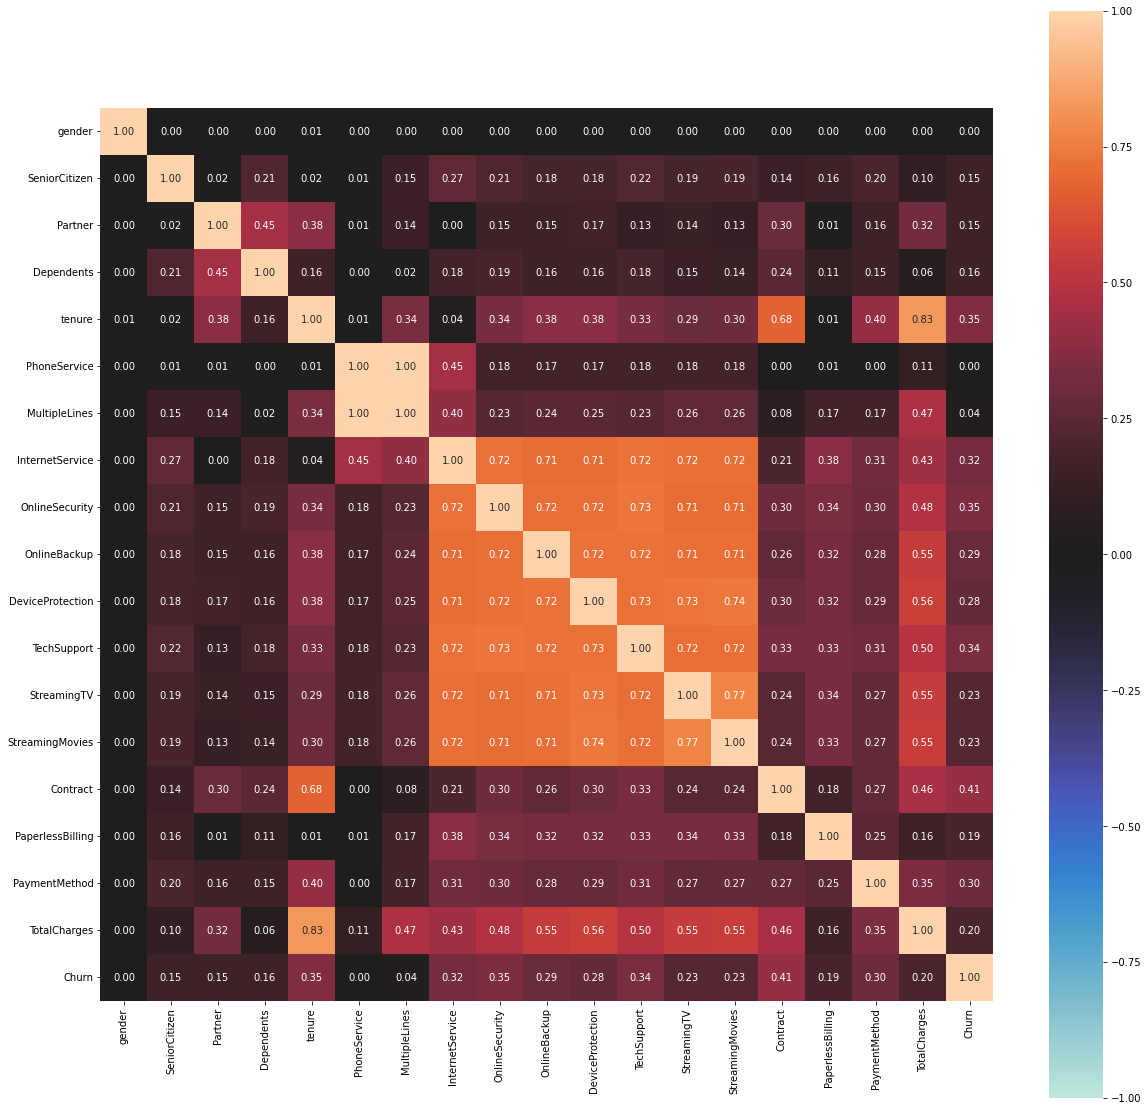

In [ ]:
from dython import nominal
nominal.associations(df,figsize=(20,20),mark_columns=False)
plt.show()

In [ ]:
df.drop(columns=['gender','PhoneService','MultipleLines','SeniorCitizen','Partner'],inplace=True)

### **Pepiline Machine Learning**

In [ ]:
df.head(1)

,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No


In [ ]:
df['Churn']=df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
df.head(2)

,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1936.30,0


In [ ]:
transformer = ColumnTransformer([  ## Column Transfomer function
    ('onehot', OneHotEncoder(drop='first'), ['Dependents','InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']) # List of columns we want to encode with OHE
], remainder='passthrough')

### **Splitting Data**

In [ ]:
X = df.drop('Churn',axis=1)
y = df['Churn']

### **Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

In [ ]:
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names())
testing.head()

,onehot__x0_Yes,onehot__x1_Fiber optic,onehot__x1_No,onehot__x2_No internet service,onehot__x2_Yes,onehot__x3_No internet service,onehot__x3_Yes,onehot__x4_No internet service,onehot__x4_Yes,onehot__x5_No internet service,onehot__x5_Yes,onehot__x6_No internet service,onehot__x6_Yes,onehot__x7_No internet service,onehot__x7_Yes,onehot__x8_One year,onehot__x8_Two year,onehot__x9_Yes,onehot__x10_Credit card (automatic),onehot__x10_Electronic check,onehot__x10_Mailed check,tenure,TotalCharges
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,401.00
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,260.55
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,225.45
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,60.0,4833.00
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,1186.80


### **Bencmark Modeling Machine Learning**

In [ ]:
model_knn=KNeighborsClassifier()
model_dt=DecisionTreeClassifier()
model_rf=RandomForestClassifier()
model_xgb=XGBClassifier()

#### Training

In [ ]:
model_machine_learning = [model_knn,model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_train = []
score_recall_mean_ml_train = []
score_precision_mean_ml_train = []
score_f1_mean_ml_train = []

for i in model_machine_learning:
    croval_classification = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('Processor',transformer),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_train = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_train = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='recall')
    model_crossval_precision_train = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='precision')
    model_crossval_f1_train =  cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_train.append(model_crossval_acc_train.mean())
    score_recall_mean_ml_train.append(model_crossval_recall_train.mean())
    score_precision_mean_ml_train.append(model_crossval_precision_train.mean())
    score_f1_mean_ml_train.append(model_crossval_f1_train.mean())
    
    print(model_crossval_acc_train, i)
    print(model_crossval_precision_train, i)
    print(model_crossval_recall_train, i)
    print(model_crossval_f1_train, i)

[0.7484787  0.74442191 0.74137931 0.7515213  0.72515213] KNeighborsClassifier()
[0.53367876 0.52760736 0.51627907 0.5410628  0.47783251] KNeighborsClassifier()
[0.39463602 0.32950192 0.42366412 0.42748092 0.37022901] KNeighborsClassifier()
[0.45374449 0.40566038 0.46540881 0.47761194 0.4172043 ] KNeighborsClassifier()
[0.7515213  0.7535497  0.73022312 0.71602434 0.71501014] DecisionTreeClassifier()
[0.53877551 0.54356846 0.48148148 0.47902098 0.45724907] DecisionTreeClassifier()
[0.48659004 0.50574713 0.50381679 0.52290076 0.49236641] DecisionTreeClassifier()
[0.51461988 0.51383399 0.50557621 0.48440367 0.48608534] DecisionTreeClassifier()
[0.78904665 0.78093306 0.79513185 0.76876268 0.75557809] RandomForestClassifier()
[0.640625   0.62765957 0.61576355 0.58095238 0.5470852 ] RandomForestClassifier()
[0.50957854 0.44444444 0.50381679 0.4389313  0.47328244] RandomForestClassifier()
[0.54545455 0.49541284 0.53218884 0.50539957 0.50413223] RandomForestClassifier()
[0.78194726 0.79411765 0

#### Testing

In [ ]:
model_machine_learning = [model_knn,model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_test = []
score_recall_mean_ml_test = []
score_precision_mean_ml_test = []
score_f1_mean_ml_test = []

for i in model_machine_learning:
    croval_classification = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('Processor',transformer),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_test = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_test = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='recall')
    model_crossval_precision_test = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='precision')
    model_crossval_f1_test =  cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_test.append(model_crossval_acc_test.mean())
    score_recall_mean_ml_test.append(model_crossval_recall_test.mean())
    score_precision_mean_ml_test.append(model_crossval_precision_test.mean())
    score_f1_mean_ml_test.append(model_crossval_f1_test.mean())
    
    print(model_crossval_acc_test, i)
    print(model_crossval_precision_test, i)
    print(model_crossval_recall_test, i)
    print(model_crossval_f1_test, i)

[0.73522459 0.71631206 0.72576832 0.7535545  0.7535545 ] KNeighborsClassifier()
[0.50746269 0.45238095 0.475      0.54444444 0.55405405] KNeighborsClassifier()
[0.30088496 0.33928571 0.33928571 0.4375     0.36607143] KNeighborsClassifier()
[0.37777778 0.3877551  0.39583333 0.48514851 0.44086022] KNeighborsClassifier()
[0.70212766 0.71867612 0.71394799 0.73933649 0.7464455 ] DecisionTreeClassifier()
[0.43243243 0.47747748 0.46956522 0.55045872 0.51754386] DecisionTreeClassifier()
[0.44247788 0.44642857 0.49107143 0.47321429 0.52678571] DecisionTreeClassifier()
[0.44541485 0.44933921 0.50877193 0.52444444 0.52212389] DecisionTreeClassifier()
[0.78250591 0.77304965 0.76595745 0.76303318 0.77014218] RandomForestClassifier()
[0.5875     0.5890411  0.55882353 0.53846154 0.59036145] RandomForestClassifier()
[0.43362832 0.41964286 0.48214286 0.52678571 0.47321429] RandomForestClassifier()
[0.49484536 0.47715736 0.54028436 0.54716981 0.51515152] RandomForestClassifier()
[0.75886525 0.76122931 0

In [ ]:
score_training = pd.DataFrame({ 'Model': ['Training Model KNN Regressor', 'Training Model DecisionTree Regressor', 'Training Model RandomForest Regressor', 'Training Model XGBoost Regressor'],
    'score_accuracy': score_accuracy_mean_ml_train,
    'score_precision': score_recall_mean_ml_train,
    'score_recall': score_precision_mean_ml_train,
    'score_f1': score_f1_mean_ml_train })
print('Score Training :')
score_training

Score Training :


,Model,score_accuracy,score_precision,score_recall,score_f1
0,Training Model KNN Regressor,0.742191,0.389102,0.519292,0.443926
1,Training Model DecisionTree Regressor,0.733266,0.502284,0.500019,0.500904
2,Training Model RandomForest Regressor,0.777890,0.474011,0.602417,0.516518
3,Training Model XGBoost Regressor,0.781542,0.509938,0.606748,0.553757


In [ ]:
score_testing= pd.DataFrame({ 'Model': ['Testing Model KNN Regressor', 'Testing Model DecisionTree Regressor', 'Testing Model RandomForest Regressor', 'Testing Model XGBoost Regressor'],
    'score accuracy test': score_accuracy_mean_ml_test,
    'score precision test': score_recall_mean_ml_test,
    'score recall test': score_precision_mean_ml_test,
    'score f1 test': score_f1_mean_ml_test})
print('Score Testing :')
score_testing

Score Testing :


,Model,score accuracy test,score precision test,score recall test,score f1 test
0,Testing Model KNN Regressor,0.736883,0.356606,0.506668,0.417475
1,Testing Model DecisionTree Regressor,0.724107,0.475996,0.489496,0.490019
2,Testing Model RandomForest Regressor,0.770938,0.467083,0.572838,0.514922
3,Testing Model XGBoost Regressor,0.765256,0.500932,0.567305,0.531399


In [ ]:
score_testing= pd.DataFrame({ 'Model': ['Model KNN Regressor', 'Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'score f1 train': score_f1_mean_ml_train,
    'score f1 test': score_f1_mean_ml_test})
print("Based Model Review : ")
score_testing.round(2)

Based Model Review : 


,Model,score f1 train,score f1 test
0,Model KNN Regressor,0.44,0.42
1,Model DecisionTree Regressor,0.50,0.49
2,Model RandomForest Regressor,0.52,0.51
3,Model XGBoost Regressor,0.55,0.53


Berdasarkan base model testing skore tertinggi di miliki oleh `Model XGBoost Regressor 53%`, sehubungan data masuk dalam data imbalance maka akan dilakukan oversampling dan smote untuk mendapatkan keseimbangan data.

### **Random Oversampling**

In [ ]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
model_machine_learning_OS = [model_knn,model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_train_OS = []
score_recall_mean_ml_train_OS = []
score_precision_mean_ml_train_OS = []
score_f1_mean_ml_train_OS = []

for i in model_machine_learning_OS:
    croval_classification = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('Processor',transformer),
        ('balancing',RandomOverSampler()),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_train_OS = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_train_OS = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='recall')
    model_crossval_precision_train_OS = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='precision')
    model_crossval_f1_train_OS =  cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_train_OS.append(model_crossval_acc_train_OS.mean())
    score_recall_mean_ml_train_OS.append(model_crossval_recall_train_OS.mean())
    score_precision_mean_ml_train_OS.append(model_crossval_precision_train_OS.mean())
    score_f1_mean_ml_train_OS.append(model_crossval_f1_train_OS.mean())
    
    print(model_crossval_acc_train_OS, i)
    print(model_crossval_precision_train_OS, i)
    print(model_crossval_recall_train_OS, i)
    print(model_crossval_f1_train_OS, i)

[0.67849899 0.668357   0.67647059 0.67647059 0.64097363] KNeighborsClassifier()
[0.42222222 0.43193717 0.43142145 0.40749415 0.40189125] KNeighborsClassifier()
[0.65517241 0.63218391 0.67938931 0.66793893 0.64122137] KNeighborsClassifier()
[0.5060241  0.50920245 0.51708767 0.52430044 0.47272727] KNeighborsClassifier()
[0.73326572 0.73529412 0.72210953 0.72616633 0.71298174] DecisionTreeClassifier()
[0.49090909 0.50627615 0.47079038 0.48754448 0.43661972] DecisionTreeClassifier()
[0.50574713 0.48659004 0.48091603 0.50381679 0.47709924] DecisionTreeClassifier()
[0.50867052 0.50909091 0.46182495 0.52075472 0.44890511] DecisionTreeClassifier()
[0.77789047 0.77890467 0.77991886 0.75760649 0.74239351] RandomForestClassifier()
[0.61157025 0.58798283 0.5620155  0.55725191 0.51503759] RandomForestClassifier()
[0.57854406 0.50574713 0.55343511 0.54198473 0.50381679] RandomForestClassifier()
[0.60038986 0.54356846 0.56420233 0.53919694 0.50478011] RandomForestClassifier()
[0.77991886 0.77890467 0

In [ ]:
model_machine_learning_OS = [model_knn,model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_test_OS = []
score_recall_mean_ml_test_OS = []
score_precision_mean_ml_test_OS = []
score_f1_mean_ml_test_OS = []

for i in model_machine_learning_OS:
    croval_classification = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('Processor',transformer),
        ('balancing',RandomOverSampler()),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_test_OS = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_test_OS = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='recall')
    model_crossval_precision_test_OS = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='precision')
    model_crossval_f1_test_OS =  cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_test_OS.append(model_crossval_acc_test_OS.mean())
    score_recall_mean_ml_test_OS.append(model_crossval_recall_test_OS.mean())
    score_precision_mean_ml_test_OS.append(model_crossval_precision_test_OS.mean())
    score_f1_mean_ml_test_OS.append(model_crossval_f1_test_OS.mean())
    
    print(model_crossval_acc_test_OS, i)
    print(model_crossval_recall_test_OS, i)
    print(model_crossval_precision_test_OS, i)
    print(model_crossval_f1_test_OS, i)

[0.63356974 0.6501182  0.64775414 0.6492891  0.62796209] KNeighborsClassifier()
[0.61061947 0.65178571 0.6875     0.67857143 0.58928571] KNeighborsClassifier()
[0.38333333 0.39428571 0.4        0.41436464 0.37426901] KNeighborsClassifier()
[0.45394737 0.4664311  0.53503185 0.48366013 0.45993031] KNeighborsClassifier()
[0.72340426 0.71867612 0.71394799 0.72748815 0.71563981] DecisionTreeClassifier()
[0.43362832 0.51785714 0.5        0.53571429 0.52678571] DecisionTreeClassifier()
[0.43925234 0.47058824 0.44525547 0.47933884 0.408     ] DecisionTreeClassifier()
[0.45454545 0.47004608 0.48275862 0.51724138 0.48430493] DecisionTreeClassifier()
[0.74940898 0.76122931 0.74468085 0.76066351 0.76303318] RandomForestClassifier()
[0.50442478 0.50892857 0.61607143 0.57142857 0.53571429] RandomForestClassifier()
[0.51886792 0.57894737 0.52307692 0.53389831 0.57      ] RandomForestClassifier()
[0.53271028 0.53456221 0.56170213 0.54468085 0.5258216 ] RandomForestClassifier()
[0.74231678 0.75177305 0

In [ ]:
score_training_OS = pd.DataFrame({ 'Model': ['Training Model KNN Regressor OS', 'Training Model DecisionTree Regressor OS', 'Training Model RandomForest Regressor OS', 'Training Model XGBoost Regressor OS'],
    'score_accuracy': score_accuracy_mean_ml_train_OS,
    'score_precision': score_recall_mean_ml_test_OS,
    'score_recall': score_precision_mean_ml_train_OS,
    'score_f1': score_f1_mean_ml_train_OS })
print('Score Training OS :')
score_training_OS

Score Training OS :


,Model,score_accuracy,score_precision,score_recall,score_f1
0,Training Model KNN Regressor OS,0.668154,0.643552,0.418993,0.505868
1,Training Model DecisionTree Regressor OS,0.725963,0.502797,0.478428,0.489849
2,Training Model RandomForest Regressor OS,0.767343,0.547314,0.566772,0.550428
3,Training Model XGBoost Regressor OS,0.764909,0.588227,0.550650,0.597968


In [ ]:
score_testing_OS = pd.DataFrame({ 'Model': ['Testing Model KNN Regressor OS', 'Testing Model DecisionTree Regressor OS', 'Testing Model RandomForest Regressor OS', 'Testing Model XGBoost Regressor OS'],
    'score_accuracy': score_accuracy_mean_ml_test_OS,
    'score_precision': score_recall_mean_ml_test_OS,
    'score_recall': score_precision_mean_ml_test_OS,
    'score_f1': score_f1_mean_ml_test_OS})
print('Score Testing os:')
score_testing_OS

Score Testing os:


,Model,score_accuracy,score_precision,score_recall,score_f1
0,Testing Model KNN Regressor OS,0.641739,0.643552,0.393251,0.479800
1,Testing Model DecisionTree Regressor OS,0.719831,0.502797,0.448487,0.481779
2,Testing Model RandomForest Regressor OS,0.755803,0.547314,0.544958,0.539895
3,Testing Model XGBoost Regressor OS,0.746794,0.588227,0.538132,0.552681


In [ ]:
score_testing= pd.DataFrame({ 'Model': ['Model KNN Regressor', 'Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'score f1 Base Model Train': score_f1_mean_ml_train,
    'score f1 Base Model Test': score_f1_mean_ml_test,
    'score f1 Train OverSampling': score_f1_mean_ml_train_OS,
    'score f1 Test OverSampling': score_f1_mean_ml_test_OS})
print("Based Model Review & Over Sampling : ")
score_testing.round(2)

Based Model Review & Over Sampling : 


,Model,score f1 Base Model Train,score f1 Base Model Test,score f1 Train OverSampling,score f1 Test OverSampling
0,Model KNN Regressor,0.44,0.42,0.51,0.48
1,Model DecisionTree Regressor,0.50,0.49,0.49,0.48
2,Model RandomForest Regressor,0.52,0.51,0.55,0.54
3,Model XGBoost Regressor,0.55,0.53,0.60,0.55


Dapat dilihat disini setelah melakukan over sampling score f1 ini mendapatkan skore semakin meningkat menjadi 56% untuk `Model XGBoost Regressor` 

### **SMOTE**

In [ ]:
model_machine_learning_S = [model_knn,model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_train_S = []
score_recall_mean_ml_train_S = []
score_precision_mean_ml_train_S = []
score_f1_mean_ml_train_S = []

for i in model_machine_learning_S:
    croval_classification = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('Processor',transformer),
        ('balancing',SMOTE()),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_train_S = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_train_S = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='recall')
    model_crossval_precision_train_S = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='precision')
    model_crossval_f1_train_S =  cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_train_S.append(model_crossval_acc_train_S.mean())
    score_recall_mean_ml_train_S.append(model_crossval_recall_train_S.mean())
    score_precision_mean_ml_train_S.append(model_crossval_precision_train_S.mean())
    score_f1_mean_ml_train_S.append(model_crossval_f1_train_S.mean())
    
    print(model_crossval_acc_train_S, i)
    print(model_crossval_precision_train_S, i)
    print(model_crossval_recall_train_S, i)
    print(model_crossval_f1_train_S, i)

[0.69472617 0.69168357 0.68965517 0.68661258 0.65922921] KNeighborsClassifier()
[0.42780749 0.43220339 0.44191919 0.4480198  0.41687345] KNeighborsClassifier()
[0.63601533 0.58237548 0.67557252 0.68320611 0.6259542 ] KNeighborsClassifier()
[0.53643411 0.53396524 0.54848485 0.53879941 0.51555556] KNeighborsClassifier()
[0.71805274 0.73225152 0.74137931 0.72616633 0.71196755] DecisionTreeClassifier()
[0.47766323 0.52208835 0.50574713 0.4765343  0.43197279] DecisionTreeClassifier()
[0.53256705 0.49425287 0.54198473 0.48473282 0.51145038] DecisionTreeClassifier()
[0.49612403 0.48508946 0.52495379 0.48224299 0.47426471] DecisionTreeClassifier()
[0.78803245 0.78498986 0.78296146 0.76572008 0.7505071 ] RandomForestClassifier()
[0.6372549  0.60891089 0.61009174 0.57918552 0.53361345] RandomForestClassifier()
[0.51724138 0.46743295 0.50381679 0.46946565 0.46946565] RandomForestClassifier()
[0.56659619 0.53043478 0.55648536 0.53688525 0.50931677] RandomForestClassifier()
[0.79107505 0.79817444 0

In [ ]:
model_machine_learning_S = [model_knn,model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_test_S = []
score_recall_mean_ml_test_S = []
score_precision_mean_ml_test_S = []
score_f1_mean_ml_test_S = []

for i in model_machine_learning_OS:
    croval_classification = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('Processor',transformer),
        ('balancing',SMOTE()),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_test_S = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_test_S = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='recall')
    model_crossval_precision_test_S = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='precision')
    model_crossval_f1_test_S =  cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_test_S.append(model_crossval_acc_test_S.mean())
    score_recall_mean_ml_test_S.append(model_crossval_recall_test_S.mean())
    score_precision_mean_ml_test_S.append(model_crossval_precision_test_S.mean())
    score_f1_mean_ml_test_S.append(model_crossval_f1_test_S.mean())
    
    print(model_crossval_acc_test_S, i)
    print(model_crossval_recall_test_S, i)
    print(model_crossval_precision_test_S, i)
    print(model_crossval_f1_test_S, i)

[0.63356974 0.67375887 0.6501182  0.62085308 0.61374408] KNeighborsClassifier()
[0.61061947 0.59821429 0.69642857 0.61607143 0.5625    ] KNeighborsClassifier()
[0.40860215 0.37634409 0.3988764  0.40677966 0.37988827] KNeighborsClassifier()
[0.46621622 0.46808511 0.52117264 0.48951049 0.44765343] KNeighborsClassifier()
[0.71631206 0.73049645 0.73522459 0.73696682 0.73222749] DecisionTreeClassifier()
[0.40707965 0.51785714 0.53571429 0.54464286 0.50892857] DecisionTreeClassifier()
[0.47368421 0.50413223 0.47014925 0.48818898 0.47787611] DecisionTreeClassifier()
[0.46222222 0.47413793 0.51476793 0.57383966 0.51260504] DecisionTreeClassifier()
[0.76122931 0.77541371 0.76359338 0.76777251 0.77725118] RandomForestClassifier()
[0.45132743 0.41964286 0.50892857 0.57142857 0.4375    ] RandomForestClassifier()
[0.57317073 0.5862069  0.52380952 0.54205607 0.6091954 ] RandomForestClassifier()
[0.48514851 0.52682927 0.51351351 0.56221198 0.51256281] RandomForestClassifier()
[0.76359338 0.77304965 0

In [ ]:
score_training_S = pd.DataFrame({ 'Model': ['Training Model KNN Regressor S', 'Training Model DecisionTree Regressor S', 'Training Model RandomForest Regressor S', 'Training Model XGBoost Regressor S'],
    'score_accuracy': score_accuracy_mean_ml_train_S,
    'score_precision': score_recall_mean_ml_train_S,
    'score_recall': score_precision_mean_ml_train_S,
    'score_f1': score_f1_mean_ml_train_S })
print('Score Training SMOTE :')
score_training_S

Score Training SMOTE :


,Model,score_accuracy,score_precision,score_recall,score_f1
0,Training Model KNN Regressor S,0.684381,0.640625,0.433365,0.534648
1,Training Model DecisionTree Regressor S,0.725963,0.512998,0.482801,0.492535
2,Training Model RandomForest Regressor S,0.774442,0.485484,0.593811,0.539944
3,Training Model XGBoost Regressor S,0.778093,0.535193,0.592174,0.562541


In [ ]:
score_testing_S = pd.DataFrame({ 'Model': ['Testing Model KNN Regressor S', 'Testing Model DecisionTree Regressor S', 'Testing Model RandomForest Regressor S', 'Testing Model XGBoost Regressor S'],
    'score_accuracy': score_accuracy_mean_ml_test_S,
    'score_precision': score_recall_mean_ml_test_S,
    'score_recall': score_precision_mean_ml_test_S,
    'score_f1': score_f1_mean_ml_test_S})
print('Score Testing SMOTE:')
score_testing_S

Score Testing SMOTE:


,Model,score_accuracy,score_precision,score_recall,score_f1
0,Testing Model KNN Regressor S,0.638409,0.616767,0.394098,0.478528
1,Testing Model DecisionTree Regressor S,0.730245,0.502845,0.482806,0.507515
2,Testing Model RandomForest Regressor S,0.769052,0.477765,0.566888,0.520053
3,Testing Model XGBoost Regressor S,0.764780,0.520465,0.552138,0.523919


In [ ]:
score_testing= pd.DataFrame({ 'Model': ['Model KNN Regressor', 'Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'score f1 Base Model Train': score_f1_mean_ml_train,
    'score f1 Base Model Test': score_f1_mean_ml_test,
    'score f1 Train OverSampling': score_f1_mean_ml_train_OS,
    'score f1 Test OverSampling': score_f1_mean_ml_test_OS,
    'score f1 Train SMOTE': score_f1_mean_ml_train_S,
    'score f1 Test SMOTE': score_f1_mean_ml_test_S})
print("Based Model Review & Over Sampling : ")
score_testing.round(2)

Based Model Review & Over Sampling : 


,Model,score f1 Base Model Train,score f1 Base Model Test,score f1 Train OverSampling,score f1 Test OverSampling,score f1 Train SMOTE,score f1 Test SMOTE
0,Model KNN Regressor,0.44,0.42,0.51,0.48,0.53,0.48
1,Model DecisionTree Regressor,0.50,0.49,0.49,0.48,0.49,0.51
2,Model RandomForest Regressor,0.52,0.51,0.55,0.54,0.54,0.52
3,Model XGBoost Regressor,0.55,0.53,0.60,0.55,0.56,0.52


#### PERBANDINGAN MODEL TESTING

In [ ]:
score_testing= pd.DataFrame({ 'Model': ['Model KNN Regressor', 'Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'Score F1 Base Model Test': score_f1_mean_ml_test,
    'Score F1 Test OverSampling': score_f1_mean_ml_test_OS,
    'Score F1 Test SMOTE': score_f1_mean_ml_test_S})
score_testing.round(2)

,Model,Score F1 Base Model Test,Score F1 Test OverSampling,Score F1 Test SMOTE
0,Model KNN Regressor,0.42,0.48,0.48
1,Model DecisionTree Regressor,0.49,0.48,0.51
2,Model RandomForest Regressor,0.51,0.54,0.52
3,Model XGBoost Regressor,0.53,0.55,0.52


Dari keseluruhan model yang ada, `Model XGBoost Regressor ` dengan `Score F1 Test OverSampling` memiliki skor tertinggi yaitu 56% dibandingkan score yang lain sehingga Model XGBoost Regressor dengan data OverSampling akan di tuning.

#### HYPERPARAMETER TUNING

In [ ]:
max_depth = list(np.arange(1, 21))
learning_rate = list(np.arange(1, 100)/100)
n_estimators = list(np.arange(100, 201))
subsample = list(np.arange(2, 10)/10)
gamma = list(np.arange(1, 11)) 
colsample_bytree = list(np.arange(1, 10)/10)
reg_alpha = list(np.logspace(-3, 1, 10)) 

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [ ]:
estimator_xgb = Pipeline([ 
        ('preprocess', transformer),
        ('balancing',RandomOverSampler()), 
        ('model', model_xgb)
        ])

skfold = StratifiedKFold(n_splits=5)

random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 500,
    cv = skfold, 
    scoring = ['f1'], 
    n_jobs = -1,
    refit = 'f1')

random_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'InternetService',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'StreamingTV',
                                                                                'StreamingMovies',
                                                                                'Cont...
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'model__reg_alpha': [0.001,
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   refit='f1', scoring=['f1'])

Mencetak score terbaik dari XGBClassifier dan total parameternya

In [ ]:
print(random_xgb.best_score_)
print(random_xgb.best_params_)

0.640186402909416
{'model__subsample': 0.4, 'model__reg_alpha': 10.0, 'model__n_estimators': 154, 'model__max_depth': 15, 'model__learning_rate': 0.1, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


Mempersiapkan prediksi yang telah di tuning untuk nanti dilakukan prediksi

In [ ]:
xgb_tuned = random_xgb.best_estimator_
xgb_tuned.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('balancing', RandomOverSampler()),
                ('model',
                 XGB...
                               gamma=9, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=15, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=154, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=10.0,
                               reg_lambda=1, ...))])

Mempersiapkan prediksi yang belum di tuning untuk nanti dilakukan prediksi

In [ ]:
xgb_base=estimator_xgb
xgb_base.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('balancing', RandomOverSampler()),
                ('model',
                 XGB...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [ ]:
y_pred_base = xgb_base.predict(X_test)
y_pred_proba_base = xgb_base.predict_proba(X_test)
y_pred_tuned = xgb_tuned.predict(X_test)
y_pred_proba_tuned = xgb_tuned.predict_proba(X_test)

In [ ]:
report_base = classification_report(y_test, y_pred_base)
report_tuned = classification_report(y_test, y_pred_tuned)

In [ ]:
cm_base = confusion_matrix(y_test, y_pred_base)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

In [ ]:
print('Classification Report Base XGBoost with RandomOverSampling : \n', report_base)
print('Classification Report Tuned XGBoost with RandomOverSampling : \n', report_tuned)

Classification Report Base XGBoost with RandomOverSampling : 
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1552
           1       0.53      0.66      0.59       561

    accuracy                           0.76      2113
   macro avg       0.70      0.73      0.71      2113
weighted avg       0.78      0.76      0.76      2113

Classification Report Tuned XGBoost with RandomOverSampling : 
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.52      0.81      0.63       561

    accuracy                           0.75      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.81      0.75      0.76      2113



In [ ]:
print('Confusion Matrix Base XGBoost with RandomOverSampling :')
cm_base_ts = confusion_matrix(y_test, y_pred_base, labels=[1,0])
df_base_ts = pd.DataFrame(data = cm_base_ts, columns=['Pred 1', 'Pred 0'], index=['Act 1', 'Act 0'])
df_base_ts


Confusion Matrix Base XGBoost with RandomOverSampling :


,Pred 1,Pred 0
Act 1,373,188
Act 0,328,1224


In [ ]:
print('Confusion Matrix Report Tuned XGBoost with RandomOverSampling :')
cm_tuned_ts = confusion_matrix(y_test, y_pred_tuned, labels=[1,0])
df_tuned_ts = pd.DataFrame(data = cm_tuned_ts, columns=['Pred 1', 'Pred 0'], index=['Act 1', 'Act 0'])
df_tuned_ts

Confusion Matrix Report Tuned XGBoost with RandomOverSampling :


,Pred 1,Pred 0
Act 1,456,105
Act 0,425,1127


- Dapat dilihat dari 2 perbandingan di atas :
  - Perbandingan sebelum di tuning :
    - ACT 1 , PRED 1 (TP) : 373 pelanggan
    - ACT 0 , PRED 1 (FP) : 328 pelanggan
    - ACT 0 , PRED 0 (TN) : 1224 pelanggan
    - ACT 1 , PRED 0 (FN) : 188 pelanggan
  - Perbandingan setelah dituning :
    - ACT 1 , PRED 1 (TP) : 456 pelanggan
    - ACT 0 , PRED 1 (FP) : 425 pelanggan
    - ACT 0 , PRED 0 (TN) : 1127 pelanggan
    - ACT 1 , PRED 0 (FN) : 105 pelanggan

# **5. KESIMPULAN & SARAN**

### Kesimpulan Data Analyst & Kesimpulan Machine Learning :
1. Pelanggan gender male memiliki persentase berhenti paling banyak 37,3%
2. Pelanggan kurang dari 60 tahun memiliki persentase tertinggi berhenti menggunakan layanan jasa perusahaan
3. Pelanggan yang tidak menggunakan akun pengguna bersama paling banyak berhenti menggunakan layanan perusahaan
4. Pelanggan yang tidak memiliki tanggungan memiliki persentase tertinggi untuk berhenti berlangganan sebanyak 21,9%
5. Pelanggan yang berhenti kurang dari 10 bulan menggunakan jasa layanan perusahaan
6. Jasa layanan telepon rumah memiliki tingkat pelanggan berhenti tertinggi 24,1%
7. Layanan telepon lebih dari 1 dengan hanya 1 pengguna sama sama memiliki tingkat pelanggan berhenti 12,1%
8. Jaringan fiber optik memiliki persentase tertinggi pelanggan berhenti 18,4%
9. Pelanggan berhenti paling banyak yang tidak menggunakan keamanan jaringan tambahan
10. Pelanggan yang tidak menggunakan layanan backup data jasa online paling banyak berhenti 17,5%
11. Dari 43,9% pelanggan tidak menggunakan keamanaan perangkat, ada 17,2% pelanggan berhenti menggunakan layanan perusahaan
12.	Banyak pelangan yang berhenti menggunakan layanan perusahaan dari pelanggan yang tidak menggunakan layanan bantuan teknis
13.	Pelanggan yang berhenti menggunakan layanan jasa perusahaan berasal dari pelanggan yang tidak menggunakan layanan internet untuk straming tv sebanyak 13.4%
14.	Pelanggan yang menggunakan jaringan internet banyak berhenti berlanggan dari kategori yang tidak menggunakan jaringan tersebut untuk straming film dari pihak ketiga sebanyak 13.3%
15.	Kontrak pelanggan dengan perusahaan paling banyak month to month dan ini paling banyak pelanggan yang berhenti 23.5%
16.	Pelanggan yang mendapatkan kertas bukti pembayaran tagihan lebih banyak berhenti berlangganan sebanyak 19.9% 
17.	Pelaggan paling banyak berhenti berlangganan dari metode pembayaran elektronik check 15.2%
18.	Pelanggan yang paling banyak berhenti dari total pembayaran kurang dari 2.000 USD sedangkan pelanggan yang memiliki tagihan di atas 2.000 USD banyak tetap menggunakan layanan perusahaan.
19. Model XGBoost Regressor memiliki skor tertinggi yaitu 56% dan dilakukan tuning skor meningkat menjadi 63%.
20. Pelanggan yang berhenti berlangganan diprediksi 373 orang, setelah dilakukan tuning pada model Model XGBoost Regressor dengan data over sampling diperoleh prediksi pelanggan yang berhenti berlangganan 425 orang.  

### Saran Implementasi Hasil Data Analyst & Machine Learning :
1. Fokuskan promosi pada pelangan yang bergender male untuk usia kurang dari 60 tahun dan pelanggan yang menggunakan layanan telekomunikasi untuk keperluan sendiri serta belum memiliki tanggungan dan promosi ini akan berdampak pada pelanggan hingga 12 bulan pertama setelah promosi dengan tujuan mereka akan bisa mereview hasil keuntungan dari promosi ini dan mempercepat perputaran keuangan perusahaan.
2. :
   - a. Produk yang difokuskan ada pada pelanggan yang masih menggunakan telephone rumah, pelanggan yang menggunakan jaringan internet fiber optic, pelanggan yang tidak menggunakan layanan keamanan jaringan, backup data online, bantuan teknis tambahan, keamanan perangkat yang digunakan, pelanggan yang tidak menggunakan layanan straming TV dan Movie dengan pihak ke tiga.
   
   - b. perusahaan dapat membuat paket layanan seperti :
     - 1. Paket layanan telepon seluler + telephone rumah diskon 10% (Untuk pelanggan pengguna Handphone dan Telephone rumah)
     - 2. Paket keamanan jaringan internet pada fiber optic diskon 10% (Untuk pelanggan yang menggunakan jaringan fiber optic dan pelanggan yang tidak menggunakan keamanan jaringan)
     - 3. Paket keamanan jaringan Handphone + Keamanan perangkat diskon 10% (Untuk pelanggan yang menggunakan jaringan internet + Keamanan perangkat)
     - 4. Paket backup data online + Bantuan teknis (Untuk pelanggan yang menginginkan keamanan datanya dapat terjaga dengan realtime)
     - 5. Paket internet straming TV + Movie diskon 12% (Untuk pelanggan yang tidak menggunakan layanan straming TV dan Movie)
     - 6. Diskon tambahan 5% jika mengambil lebih dari 1 paket layanan
#
3. Untuk pelanggan yang masih menggunakan kontrak perbulan, coba di tawarkan untuk menggunakan kontrak 1 tahun dan tawarkan keunggulan / keuntungan yang akan mereka dapatkan terutama dari biaya yang lebih hemat dan berikan diskon tambahan jika mereka menggunakan pembayaran dengan credit card karena credit card memiliki persentase pelanggan berhenti paling kecil atau tawarkan dengan pembayaran tranfer bank karena ini adalah persentase terkecil kedua pelanggan berhenti.

4.  :
   - Target pelangan yang mendapatkan promo sebelum menggunakan machine learning :
   1. Total pelanggan 7.043
   2. Pelanggan yang berhenti berlangganan 1.869
   3. Pendapatan setiap pelanggan (Ex Paket Basic) 1.000 USD
   4. Pendapatan setiap bulan = 7.043 x 1.000 USD = 7.043.000 USD
   5. Biaya marketing per pelanggan yang sudah ada : 10 USD X 1.869 pelanggan = 18.690 USD
   6. Total biaya marketing untuk pelanggan yang sudah ada : 10 USD X 7.043 pelanggan = 70.430 USD per pelanggan yang sudah ada untuk promosinya
   7.  Jika total biaya promosi yang dikeluarkan sebanyak ini, dan bisa menghasilkan pelanggan dengan membeli paket basic ada 7.043.000 USD pendapatan yang perusahaan akan terima (1.000 USD paket basic X 7.043 pelanggan) dengan laba bersih 6.972.570 USD dengan total beban promosi yang dikeluarkan sekitar 1% dibulan berikutnya.
#   
   - Target pelangan yang mendapatkan promo menggunakan machine learning dengan memanfaatkan pelanggan yang sudah ada :
   1. Total pelanggan 7.043
   2. Pelanggan 425 yang diprediksi berhenti berlangganan (FP)
   3. Pendapatan setiap pelanggan (Ex Paket Basic) 1.000 USD
   4. Pendapatan setiap bulan = 7.043 x 1.000 USD = 7.043.000 USD
   5. Biaya marketing per pelanggan yang sudah ada : 10 USD
   6. Total biaya marketing untuk pelanggan yang sudah ada : 10 USD X 425 pelanggan = 4.250 USD
   7. Jika total biaya promosi yang dikeluarkan 4.250 USD, dan bisa menghasilkan pelanggan dengan membeli paket basic ada 7.043.000 USD pendapatan yang perusahaan akan terima (1.000 USD paket basic X 7.043 pelanggan) dengan laba bersih 7.038.750 USD dengan total beban promosi yang dikeluarkan sekitar 0,06% dibulan berikutnya.